In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from itertools import permutations
from utils import import_data, get_accuracy, get_accuracy_by_cue, plot_accuracy, plot_accuracy_by_cue, save_fig
from supplemental_data import rule_change, cscheme, cue_names

In [35]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Import data
Specify the list of all animals and the directory the csv files are. Choose a subset of animals to work with.

In [18]:
all_animals = [
    'JC240',
    'JC241',
    'JC258',
    'JC267',
    'JC274',
    'JC283',
]

datadir = 'data/'

animals = all_animals[:]

Import animal data and store them in a dict under animal name.

In [19]:
data = {}

for animal in animals:
    data[animal] = import_data(datadir,
                               animal)

Get the number of training days for each animal.

In [20]:
sessions = {}

for animal in animals:
    sessions[animal] = data[animal]['Session_ID'].unique()

Calculate the accuracy for each training day.

In [21]:
accuracy = {}

for animal in animals:
    accuracy[animal] = get_accuracy(data,
                                    animal)

Get the unique food cues for each experiment. Calculate the accuracy by training day and food cue type.

In [22]:


cues = {}
accuracy_by_cue = {}

for animal in animals:
    cues[animal] = data[animal]['Flavor'].unique()
    accuracy_by_cue[animal] = get_accuracy_by_cue(data,
                                                  animal)



# Plotting

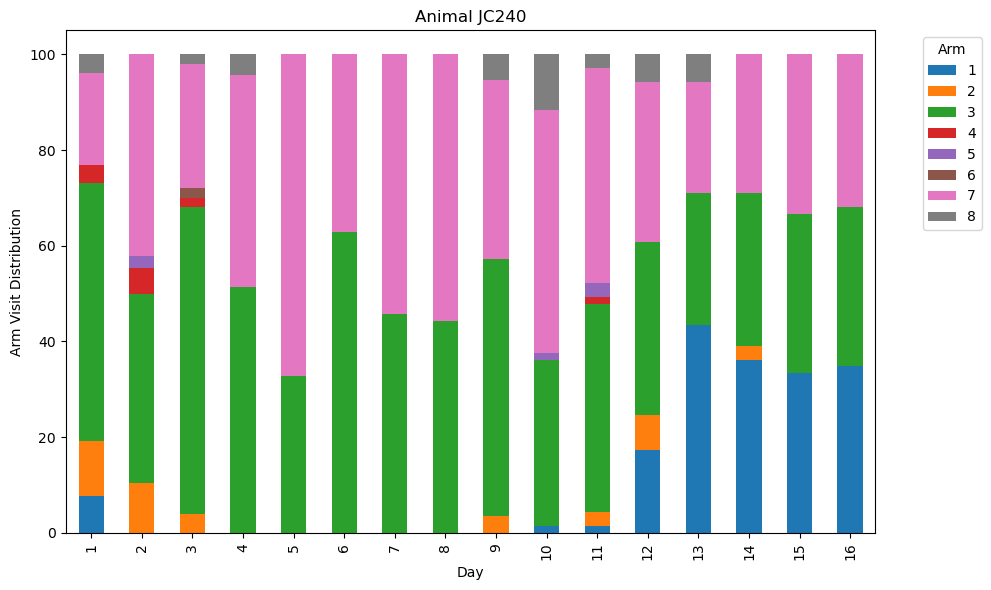

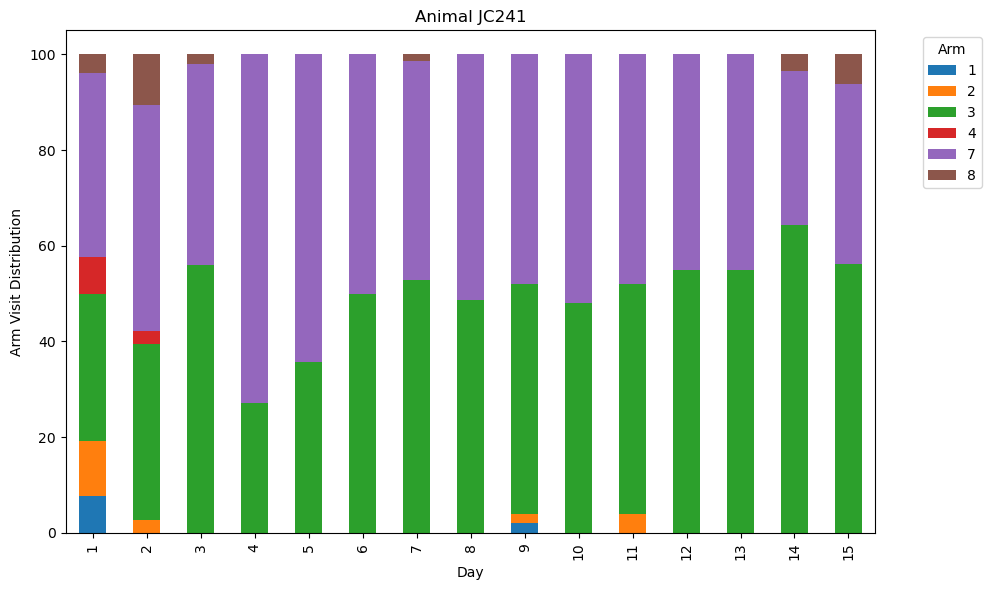

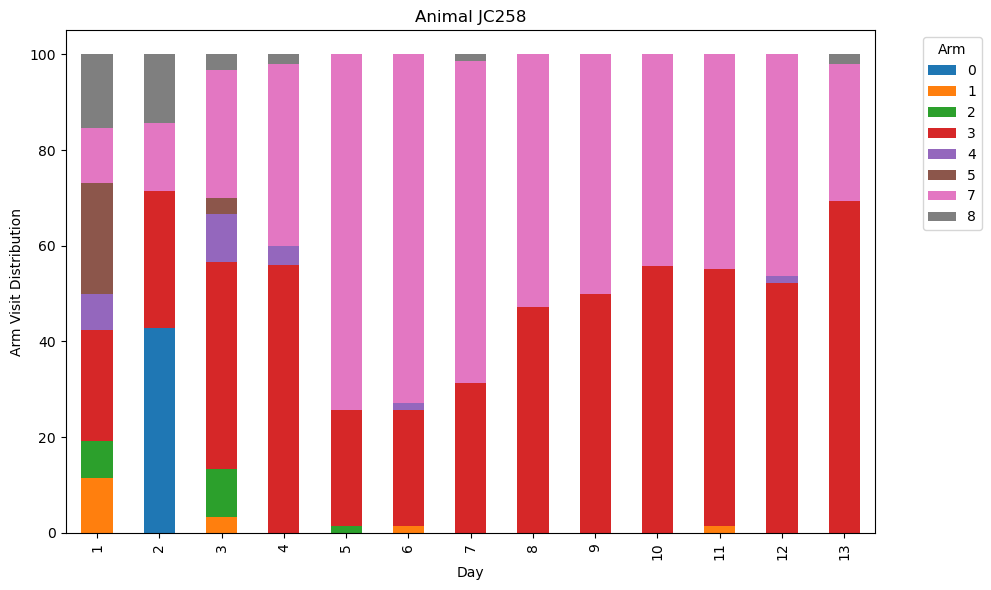

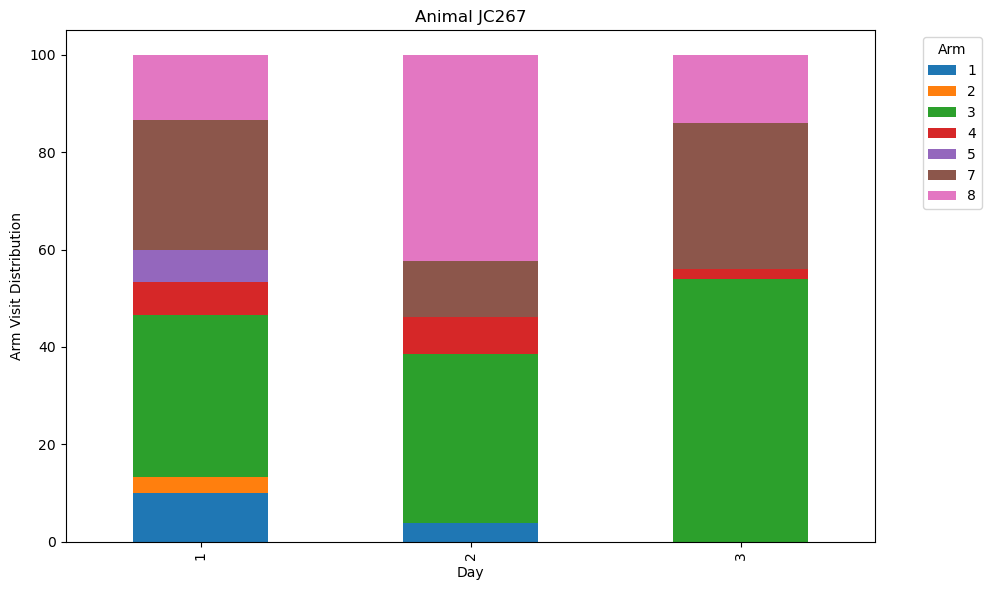

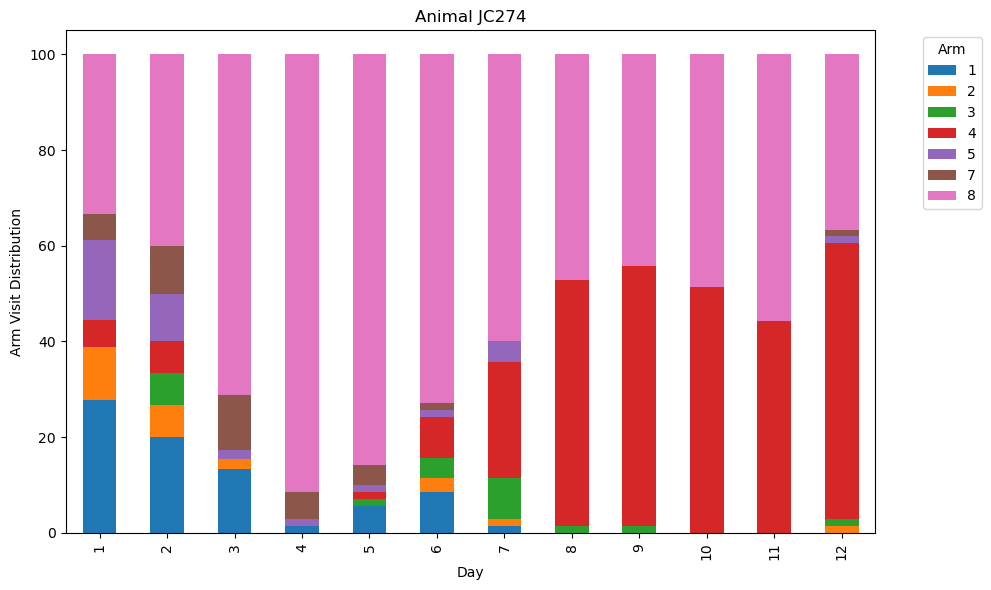

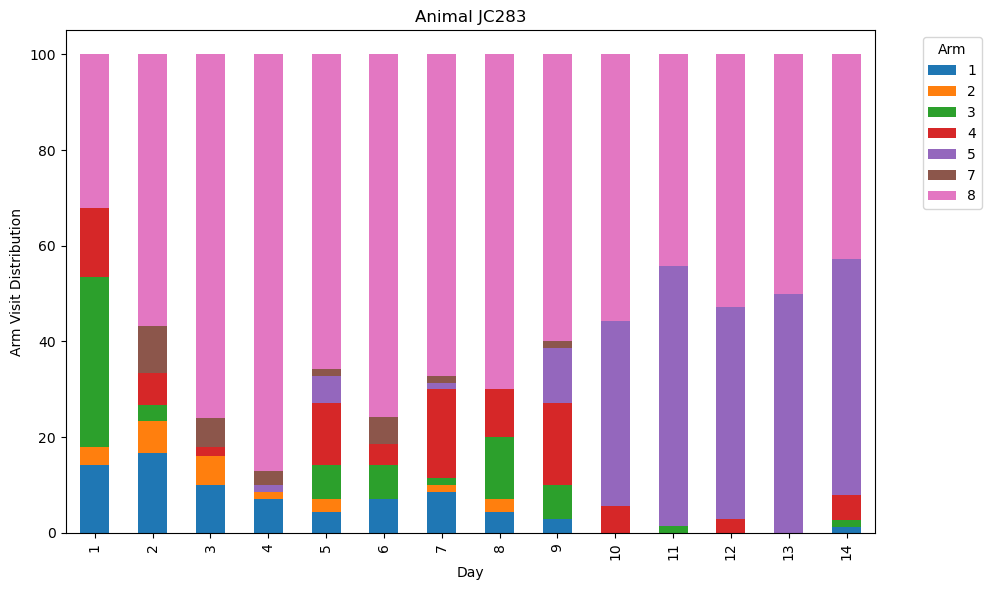

In [23]:
for animal in animals:
    df = data[animal]
    # Pivot the DataFrame to get arm distribution by session_id
    pivot_df = pd.pivot_table(df, index='Session_ID', columns='Arm', aggfunc='size', fill_value=0)

    # Calculate row-wise percentages
    row_sums = pivot_df.sum(axis=1)
    percentage_df = pivot_df.div(row_sums, axis=0) * 100

    # Create a stacked bar plot of percentages
    ax = percentage_df.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Set plot labels and title
    plt.xlabel('Day')
    plt.ylabel('Arm Visit Distribution')
    plt.title('Animal ' + animal)

    # Show the plot
    plt.legend(title='Arm', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


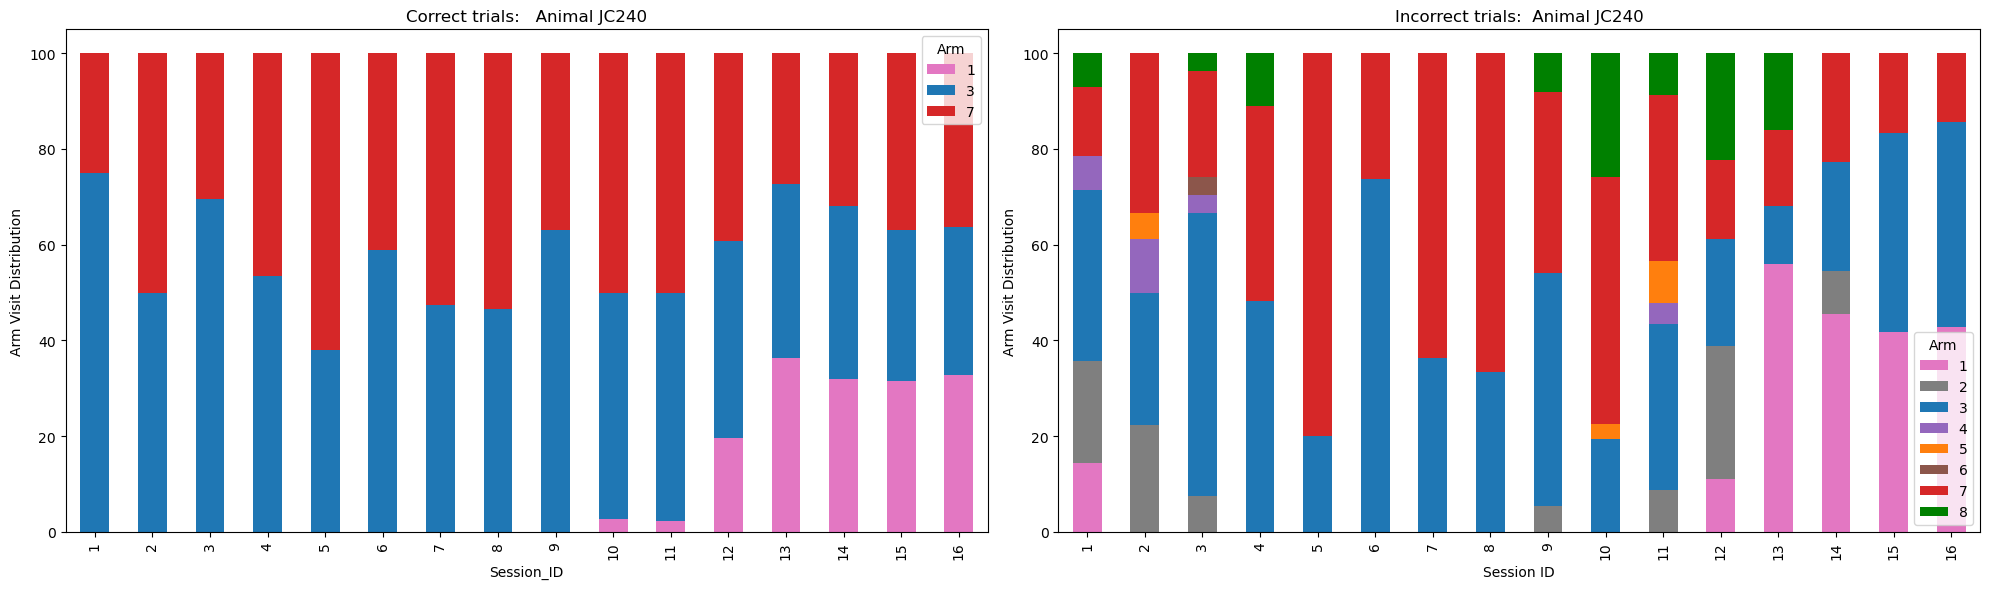

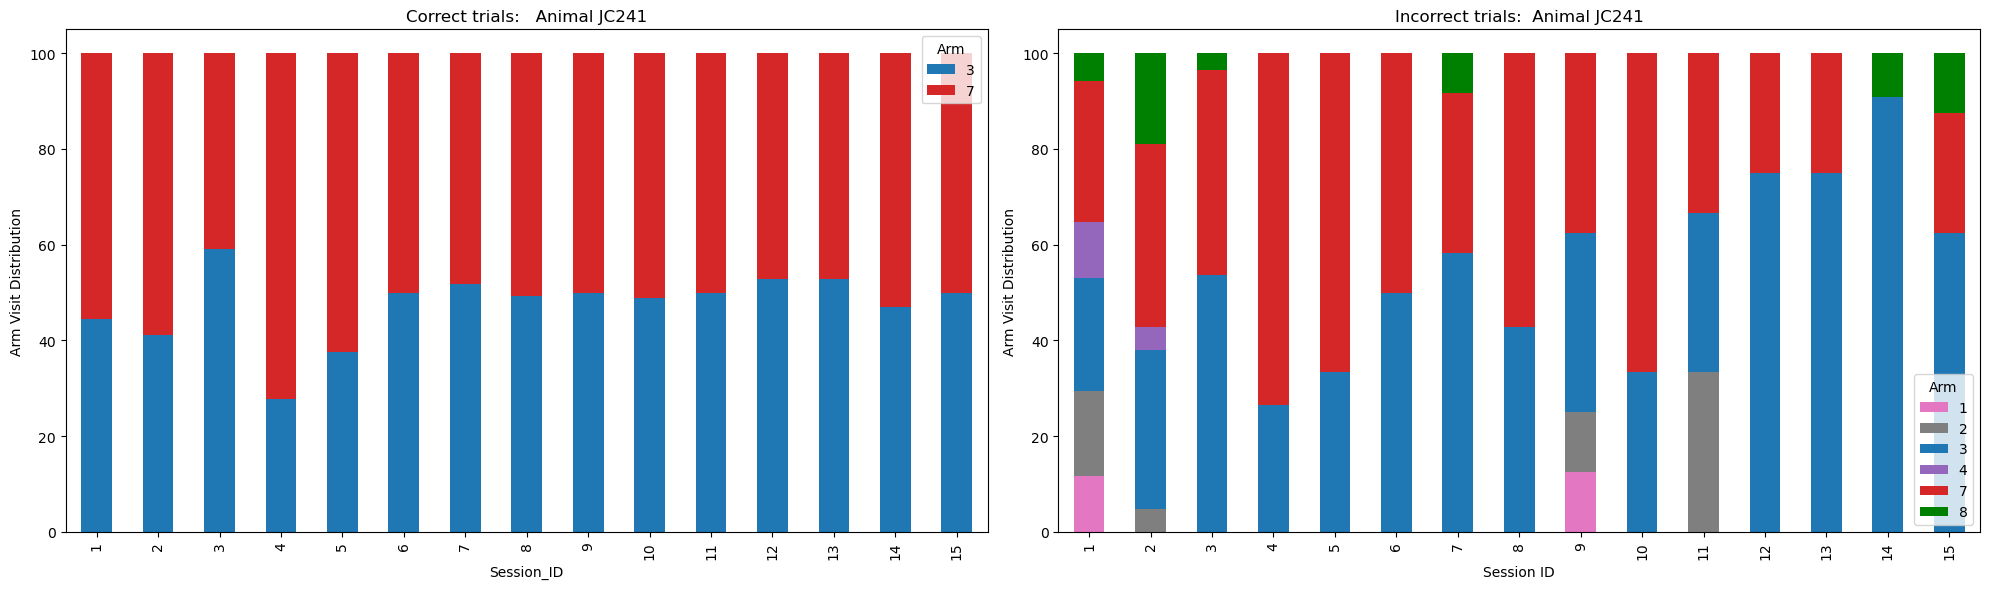

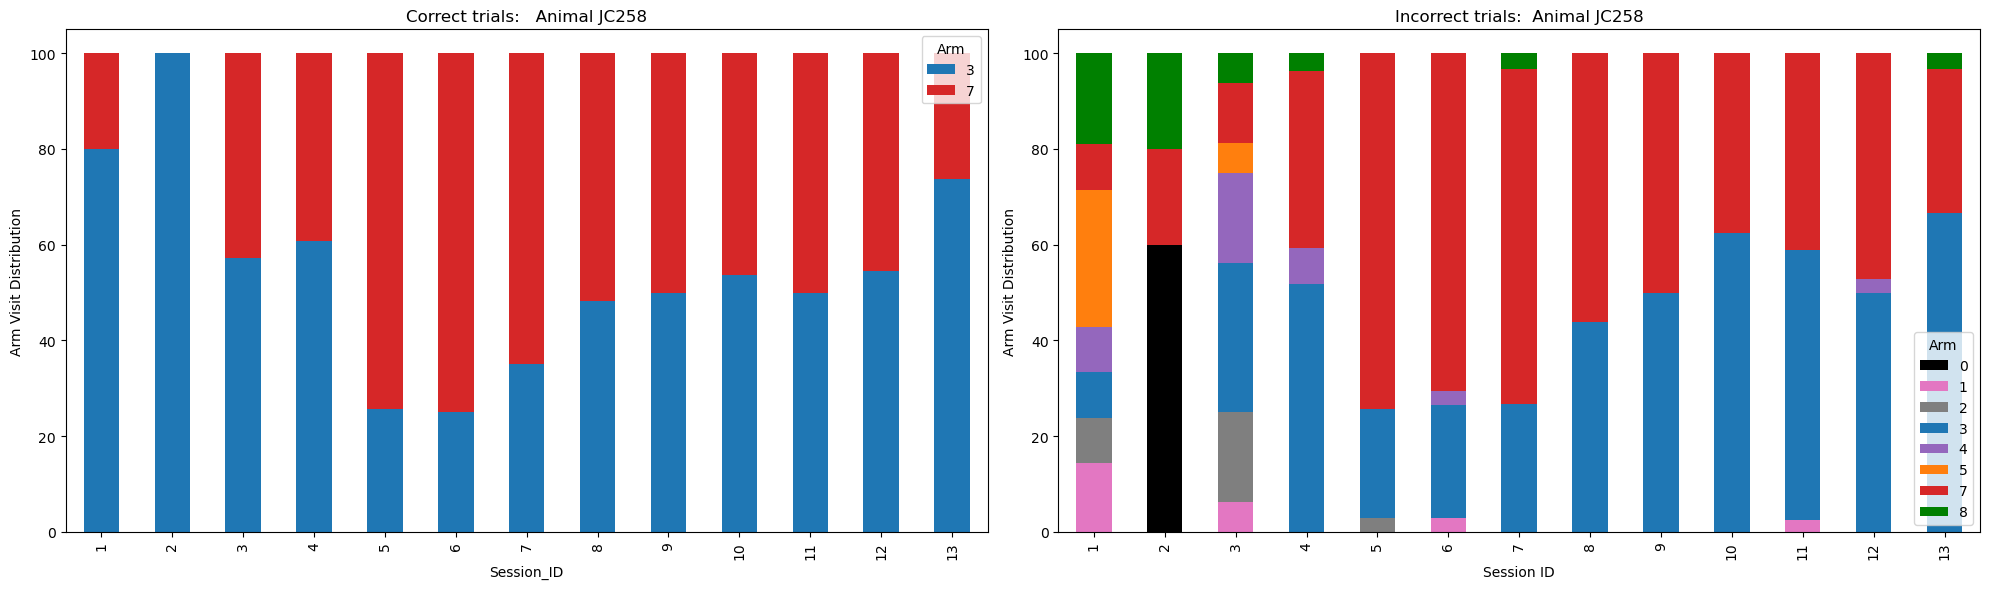

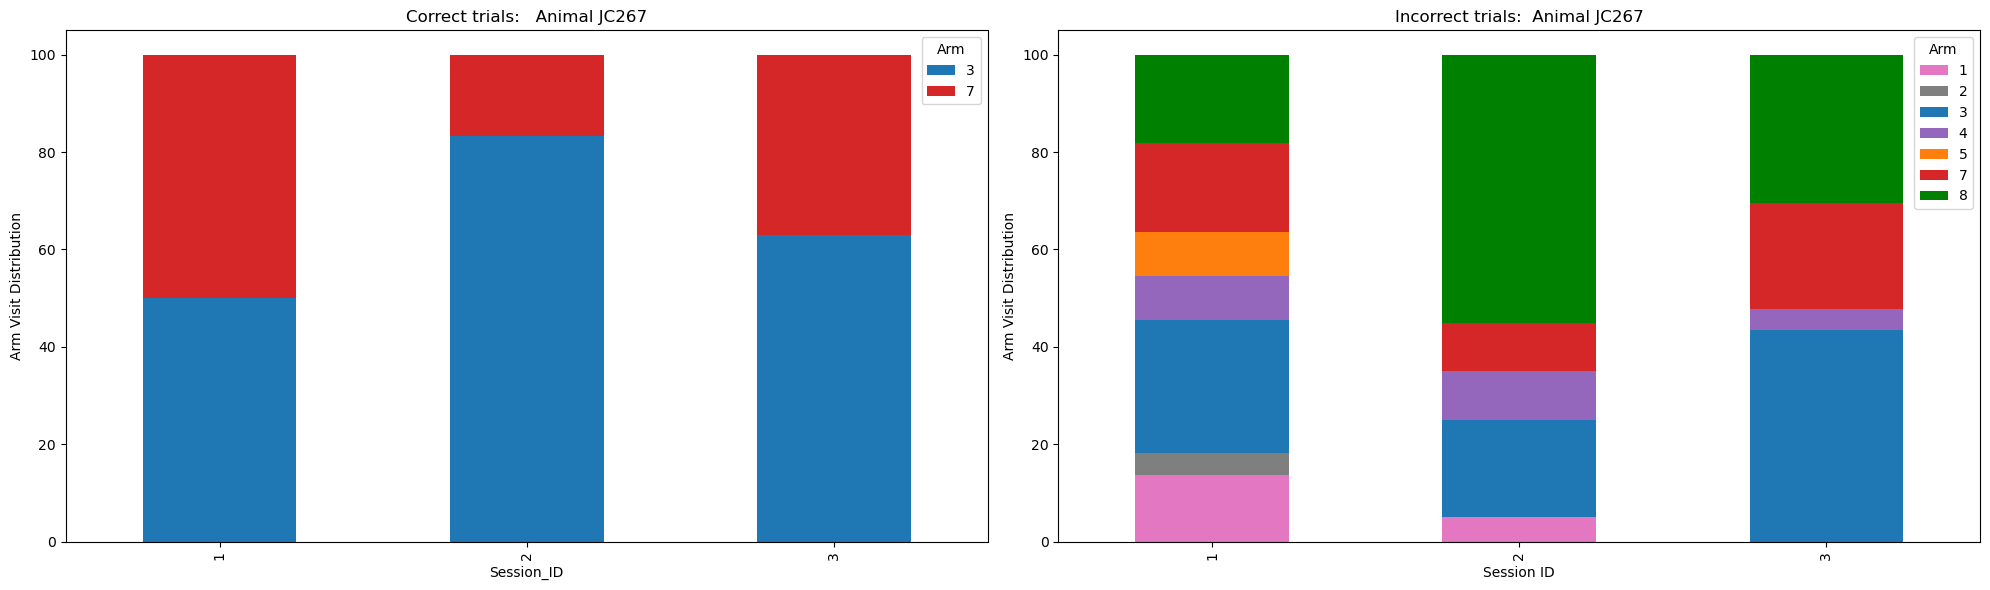

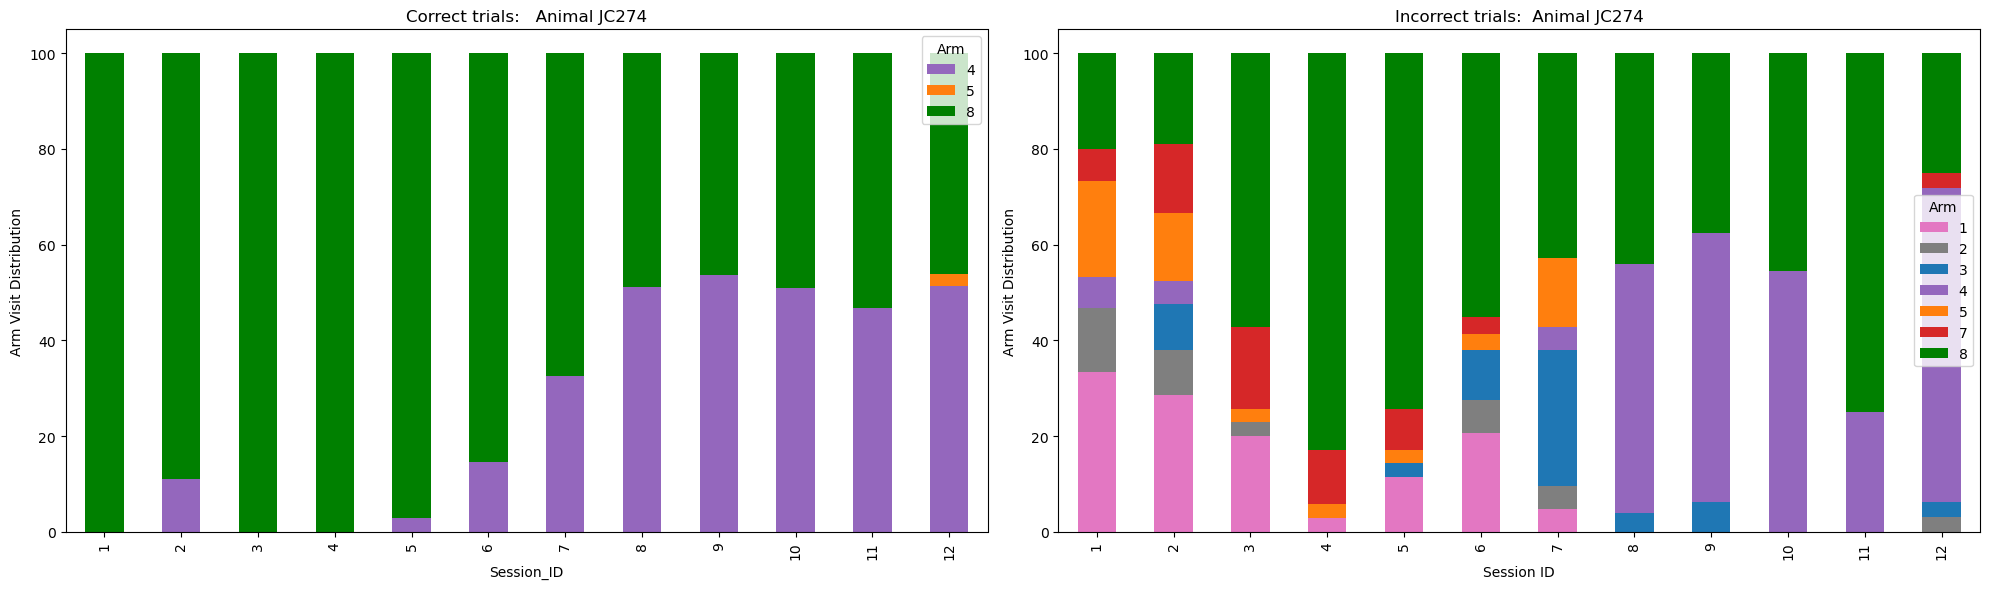

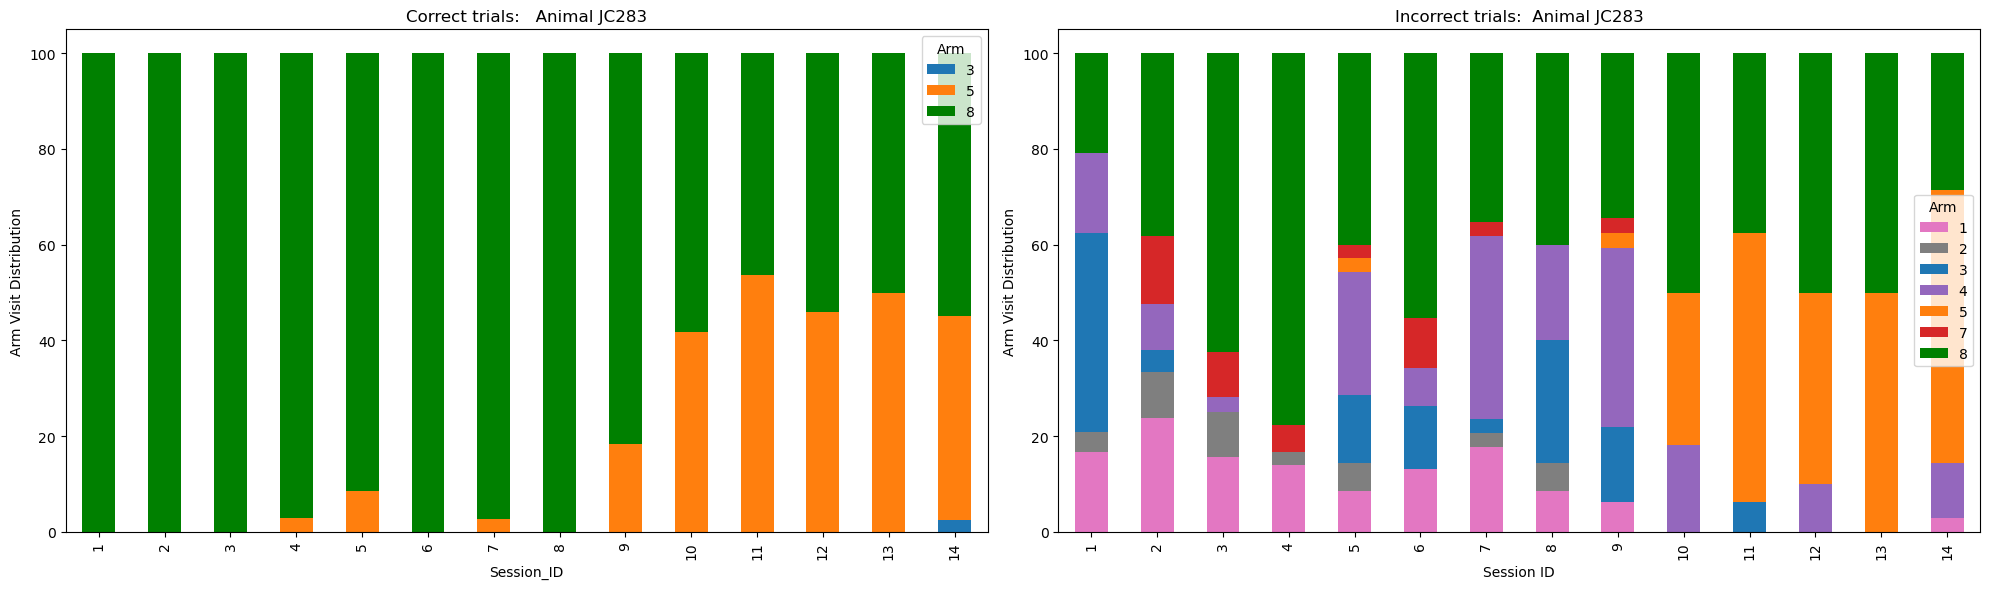

In [24]:
for animal in animals:
    df = data[animal]

    # Create two subplots, one for each 'correct' value
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=True)
    
    # Create a custom color mapping for arm numbers
    arm_colors = {1: 'tab:pink', 2: 'tab:gray', 3: 'tab:blue', 4: 'tab:purple', 5: 'tab:orange', 6: 'tab:brown', 7: 'tab:red', 8: 'green'}


    # Plot for correct=1
    correct_1_df = df[df['CorrectBool'] == 1]
    pivot_df_correct_1 = pd.pivot_table(correct_1_df, index='Session_ID', columns='Arm', aggfunc='size', fill_value=0)
    pivot_df_correct_1_percentage = pivot_df_correct_1.div(pivot_df_correct_1.sum(axis=1), axis=0) * 100
    pivot_df_correct_1_percentage.plot(kind='bar', stacked=True, ax=axes[0], color=[arm_colors.get(x, 'black') for x in pivot_df_correct_1_percentage.columns])
    axes[0].set_ylabel('Arm Visit Distribution')
    axes[0].set_title('Correct trials:   Animal '+animal)

    # Plot for correct=0
    correct_0_df = df[df['CorrectBool'] == 0]
    pivot_df_correct_0 = pd.pivot_table(correct_0_df, index='Session_ID', columns='Arm', aggfunc='size', fill_value=0)
    pivot_df_correct_0_percentage = pivot_df_correct_0.div(pivot_df_correct_0.sum(axis=1), axis=0) * 100
    pivot_df_correct_0_percentage.plot(kind='bar', stacked=True, ax=axes[1], color=[arm_colors.get(x, 'black') for x in pivot_df_correct_0_percentage.columns])
    axes[1].set_ylabel('Percentage')
    axes[1].set_ylabel('Arm Visit Distribution')
    axes[1].set_title('Incorrect trials:  Animal '+animal)

    plt.xlabel('Session ID')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.show()


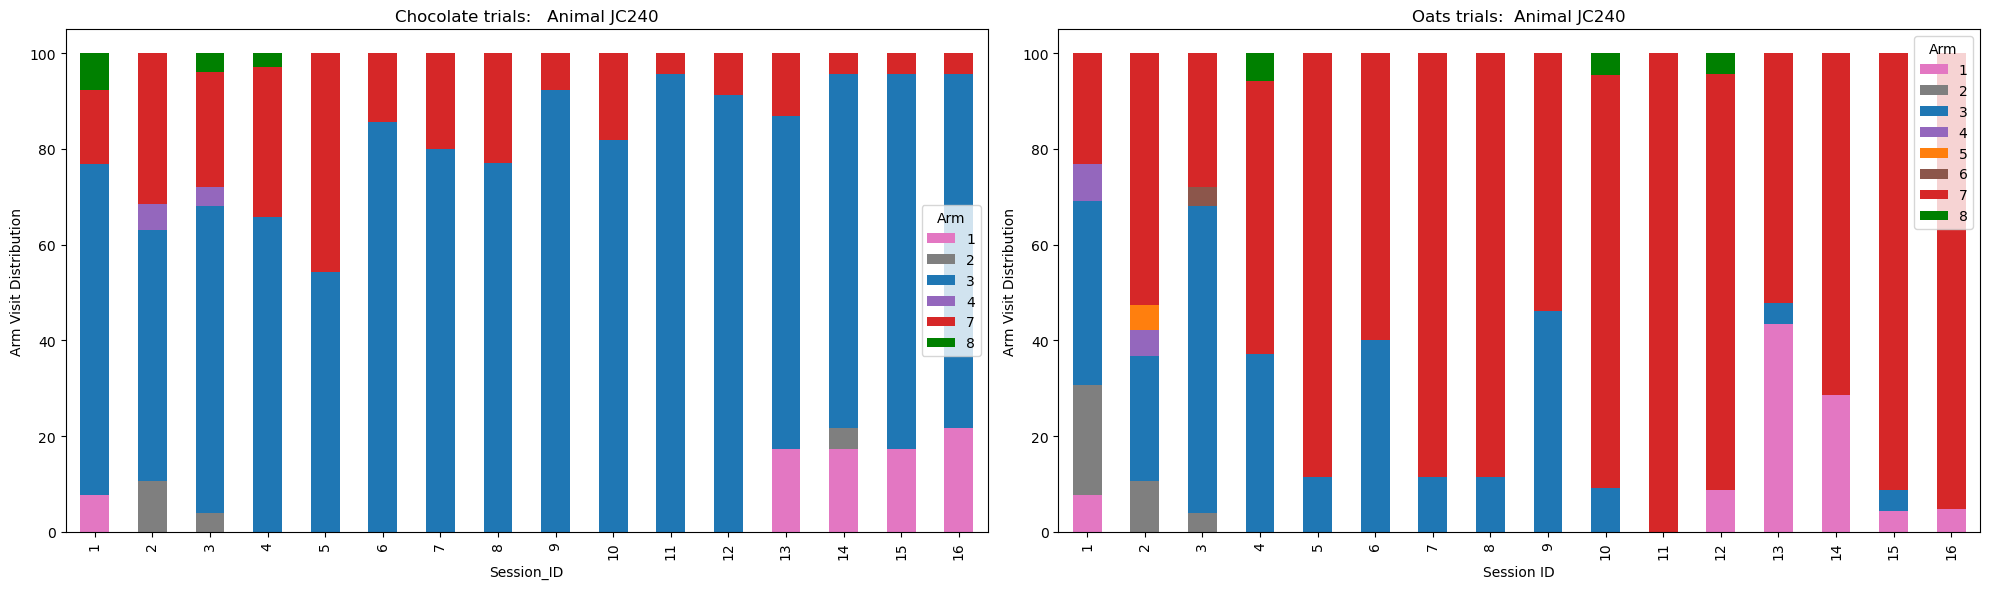

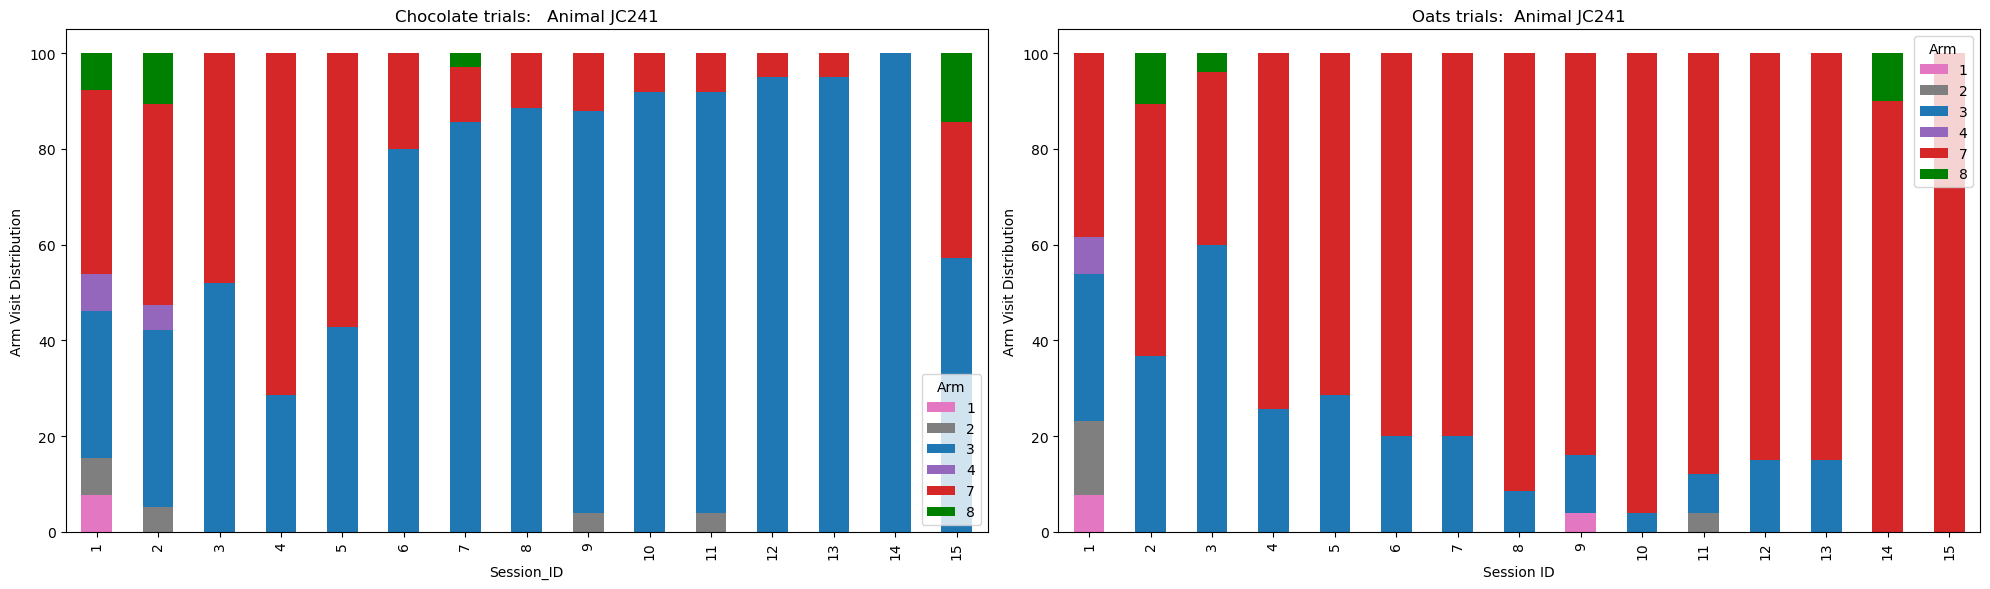

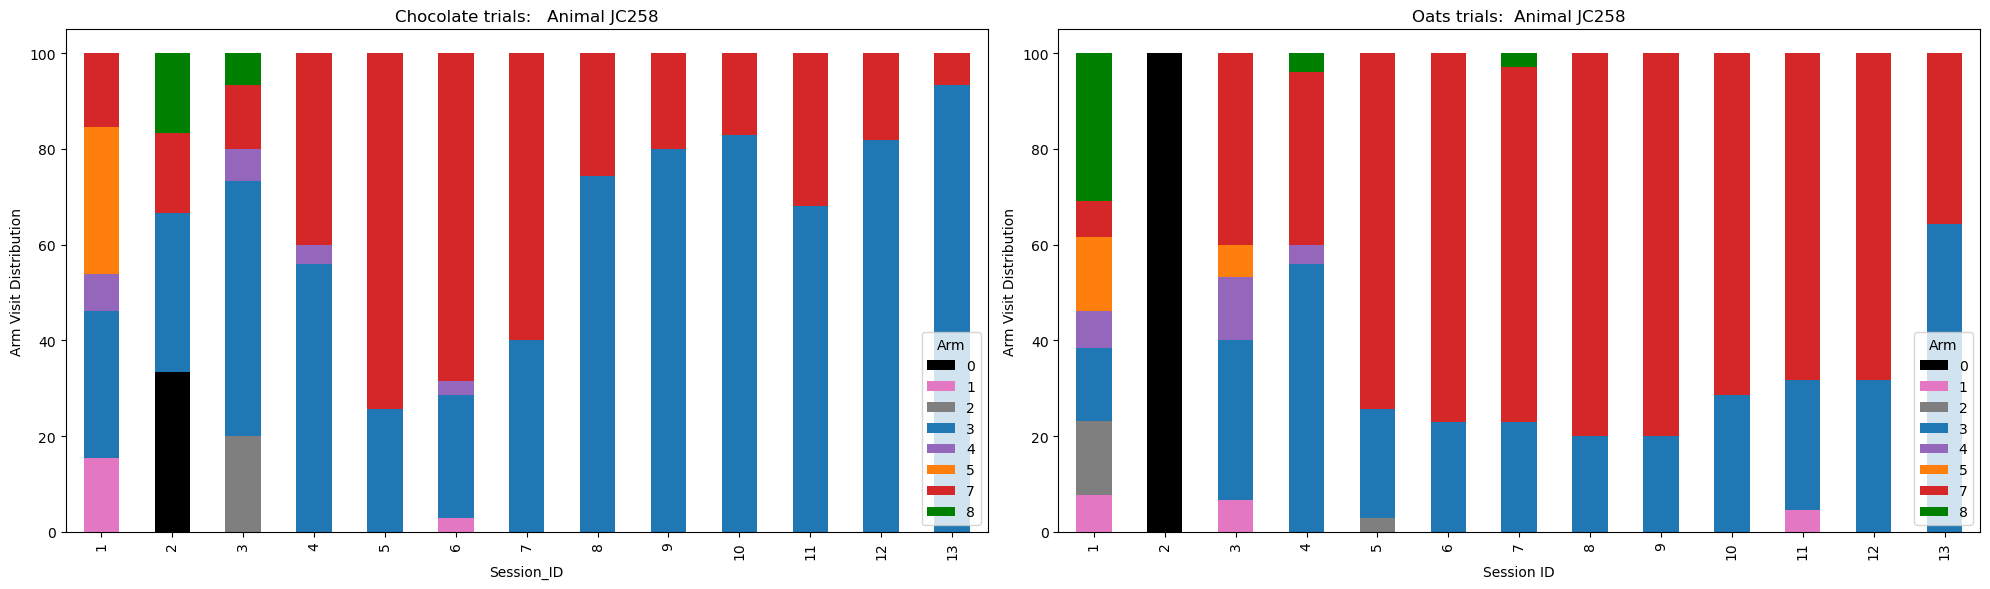

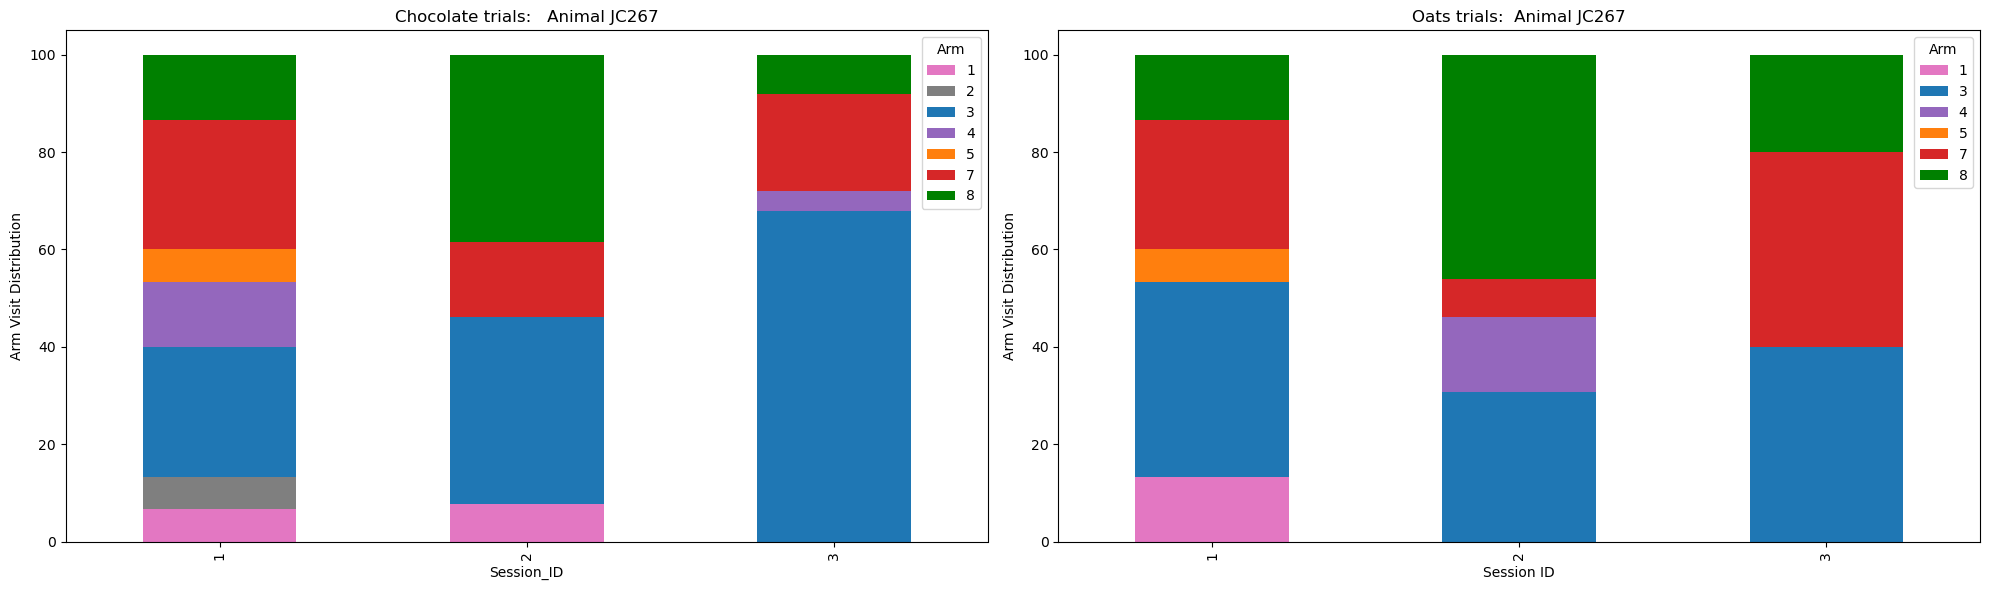

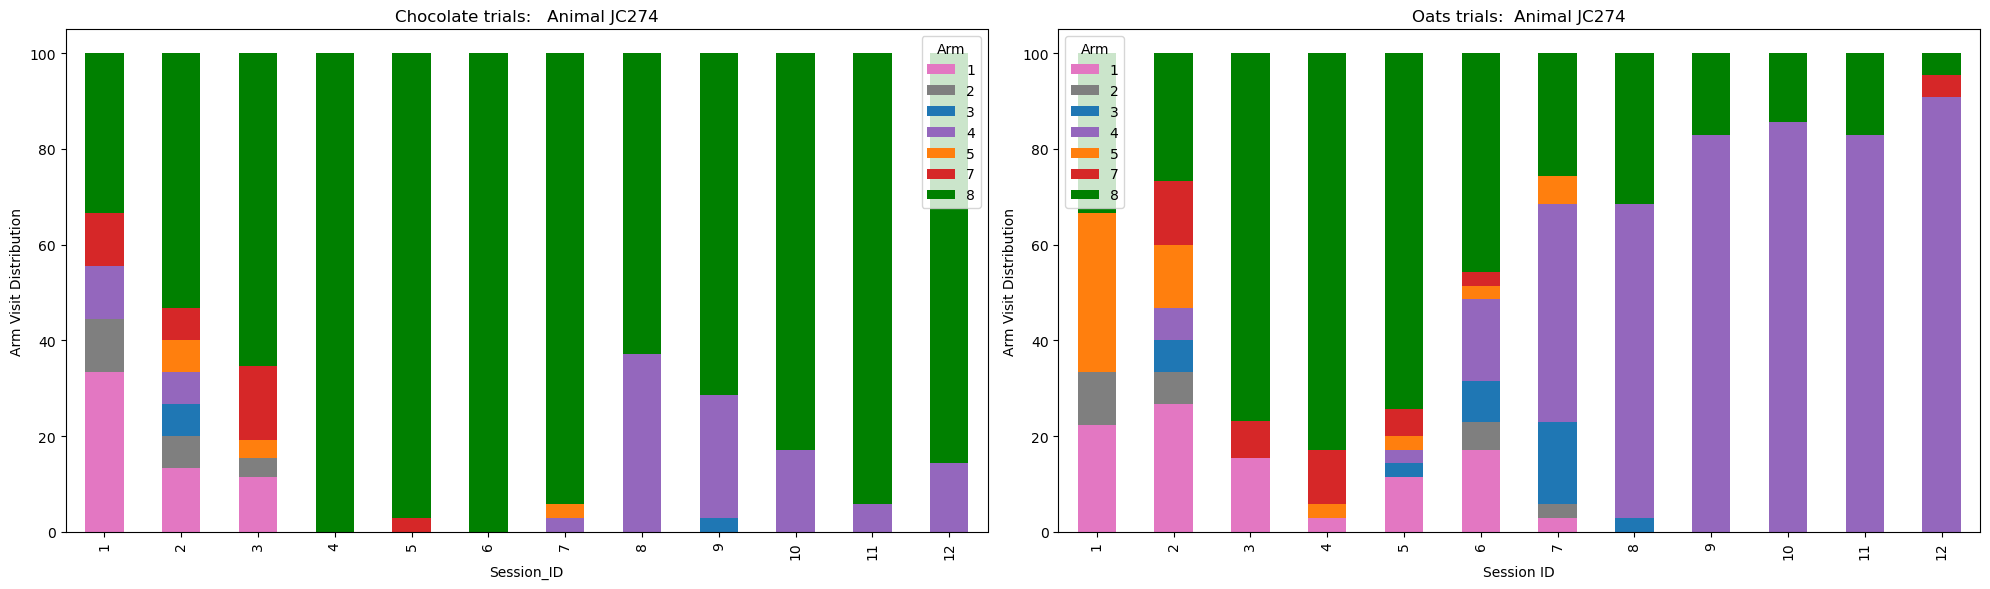

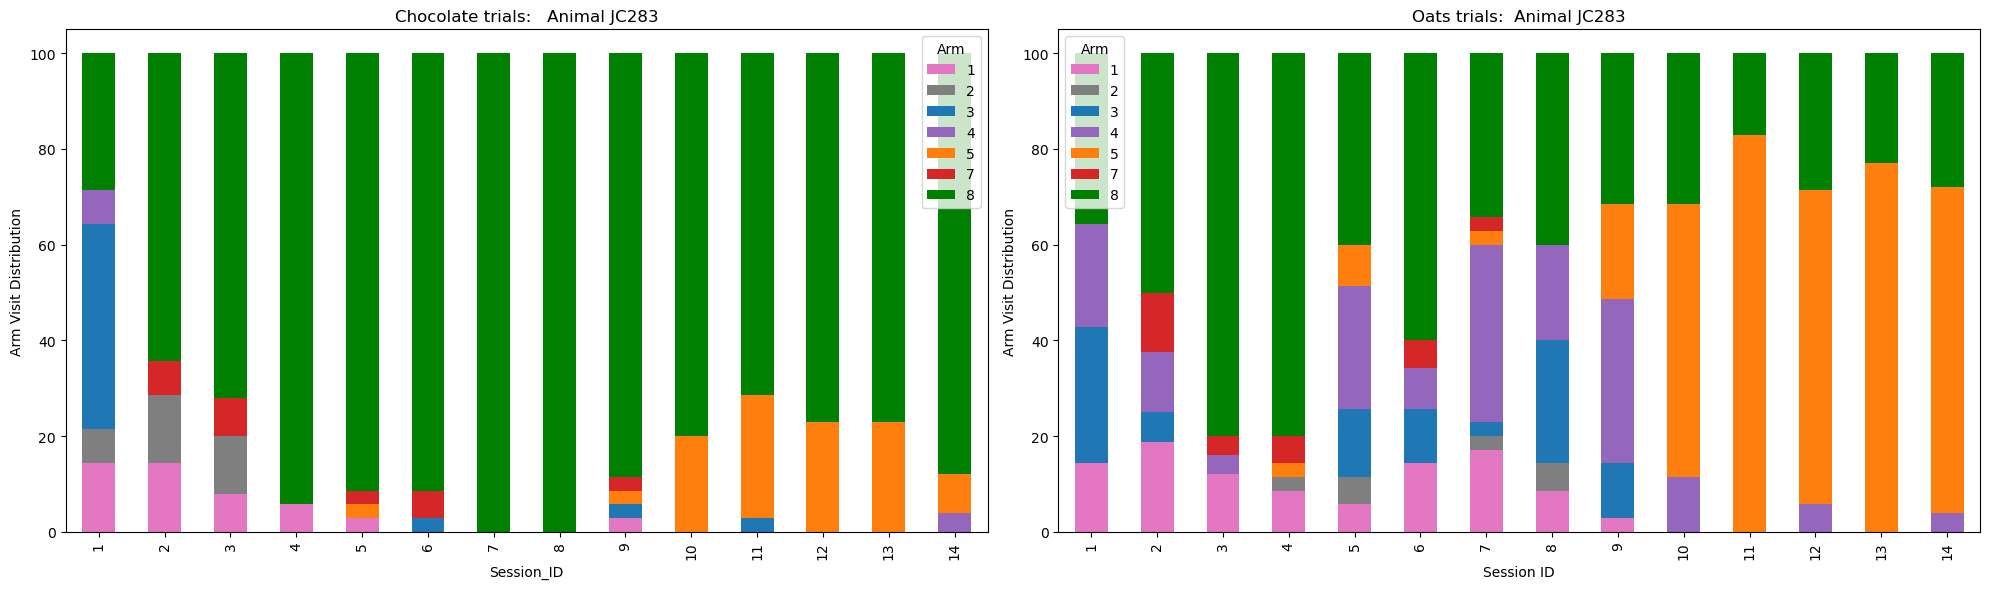

In [25]:
for animal in animals:
    df = data[animal]

    # Create two subplots, one for each 'correct' value
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=True)
    
    # Create a custom color mapping for arm numbers
    arm_colors = {1: 'tab:pink', 2: 'tab:gray', 3: 'tab:blue', 4: 'tab:purple', 5: 'tab:orange', 6: 'tab:brown', 7: 'tab:red', 8: 'green'}


    # Plot for correct=1
    correct_1_df = df[df['Flavor'] == "C"]
    pivot_df_correct_1 = pd.pivot_table(correct_1_df, index='Session_ID', columns='Arm', aggfunc='size', fill_value=0)
    pivot_df_correct_1_percentage = pivot_df_correct_1.div(pivot_df_correct_1.sum(axis=1), axis=0) * 100
    pivot_df_correct_1_percentage.plot(kind='bar', stacked=True, ax=axes[0], color=[arm_colors.get(x, 'black') for x in pivot_df_correct_1_percentage.columns])
    axes[0].set_ylabel('Arm Visit Distribution')
    axes[0].set_title('Chocolate trials:   Animal '+animal)

    # Plot for correct=0
    correct_0_df = df[df['Flavor'] == "H"]
    if animal =="JC283":
        correct_0_df = df[df['Flavor'] == "S"]
    pivot_df_correct_0 = pd.pivot_table(correct_0_df, index='Session_ID', columns='Arm', aggfunc='size', fill_value=0)
    pivot_df_correct_0_percentage = pivot_df_correct_0.div(pivot_df_correct_0.sum(axis=1), axis=0) * 100
    pivot_df_correct_0_percentage.plot(kind='bar', stacked=True, ax=axes[1], color=[arm_colors.get(x, 'black') for x in pivot_df_correct_0_percentage.columns])
    axes[1].set_ylabel('Percentage')
    axes[1].set_ylabel('Arm Visit Distribution')
    axes[1].set_title('Oats trials:  Animal '+animal)

    plt.xlabel('Session ID')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.show()


{'C': 3, 'H': 7}


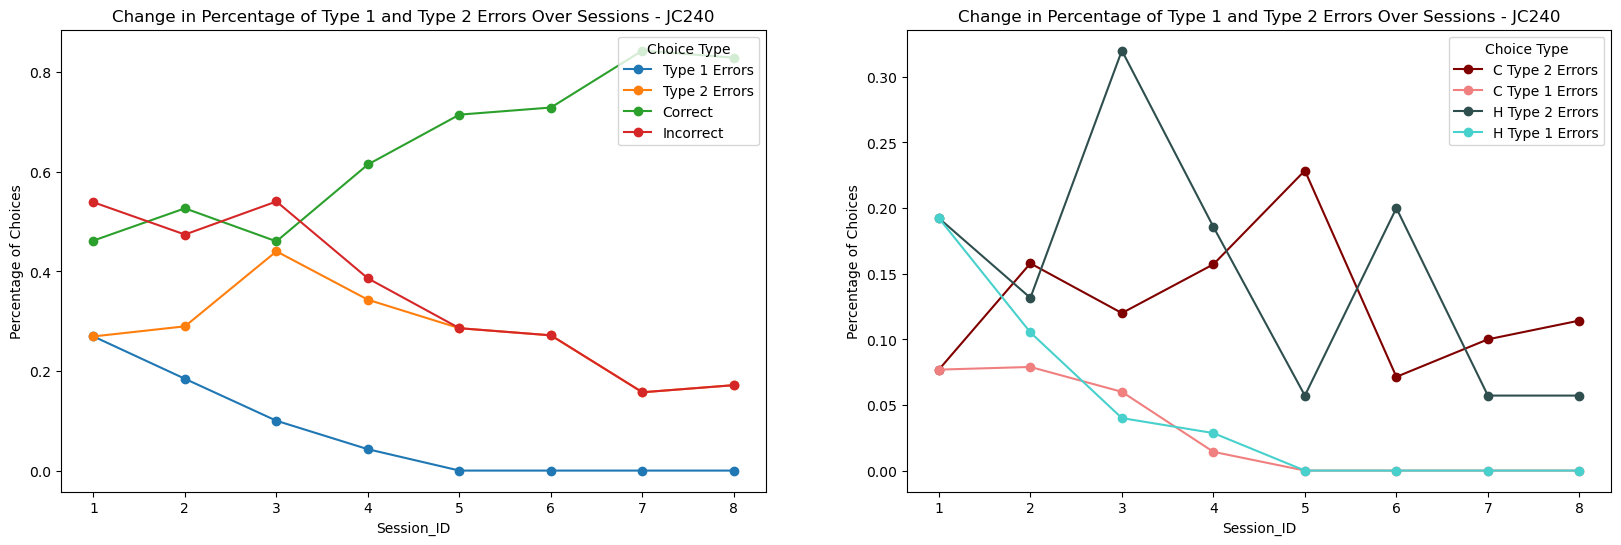

{'C': 3, 'H': 7}


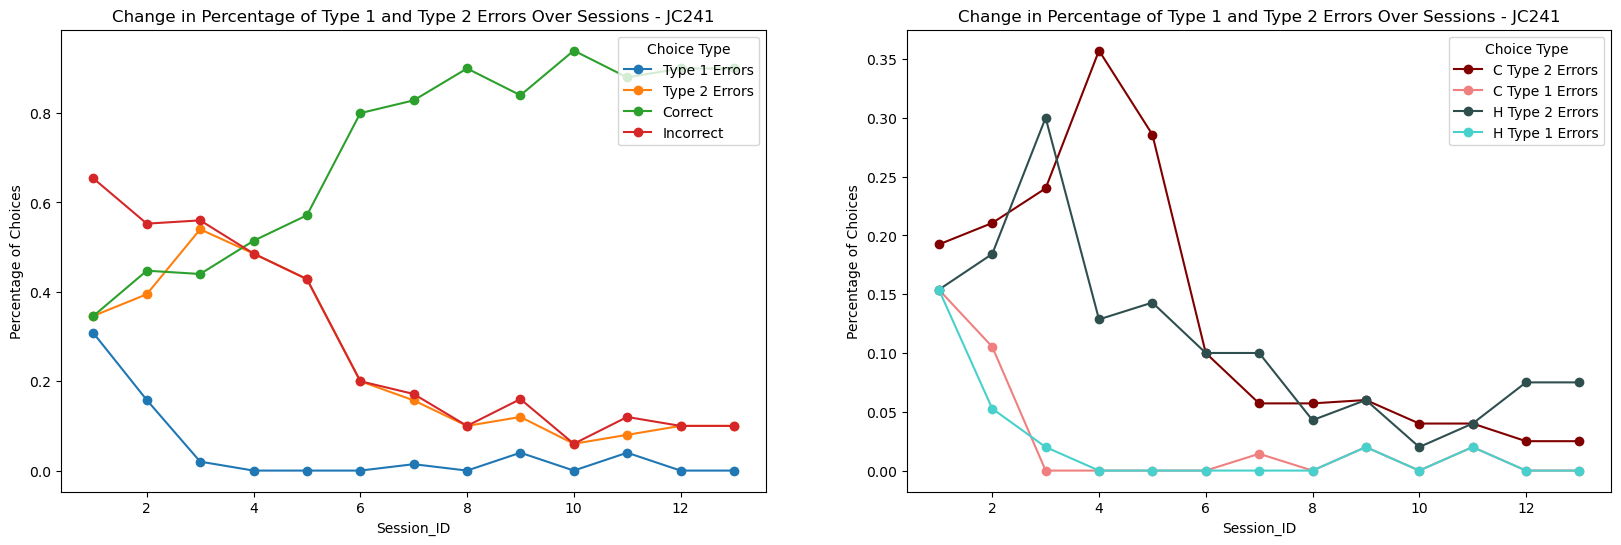

{'C': 3, 'H': 7}


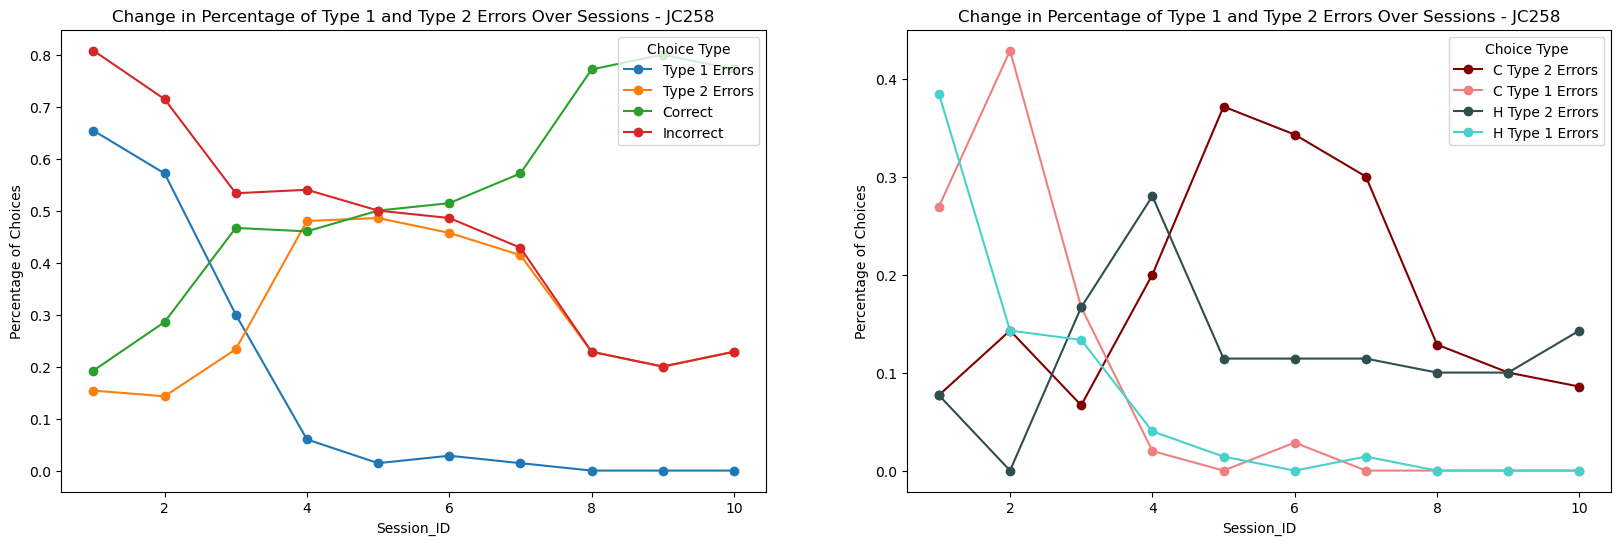

{'C': 3, 'H': 7}


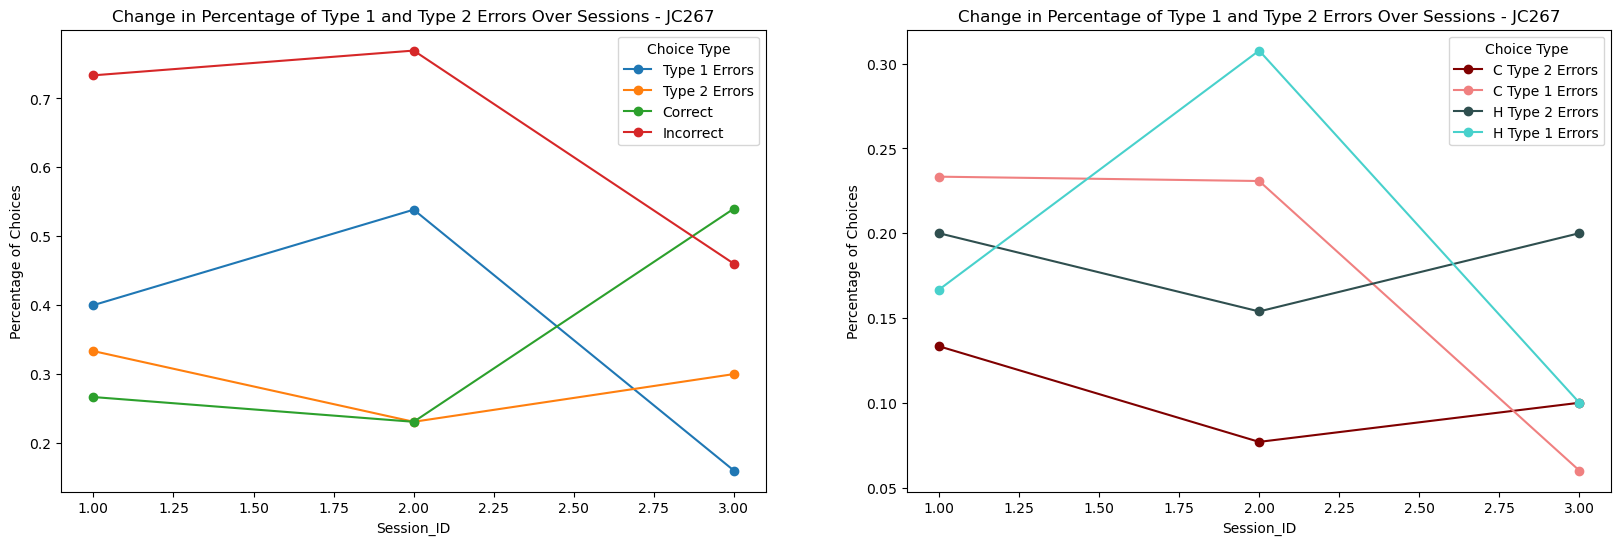

{'C': 8, 'H': 4}


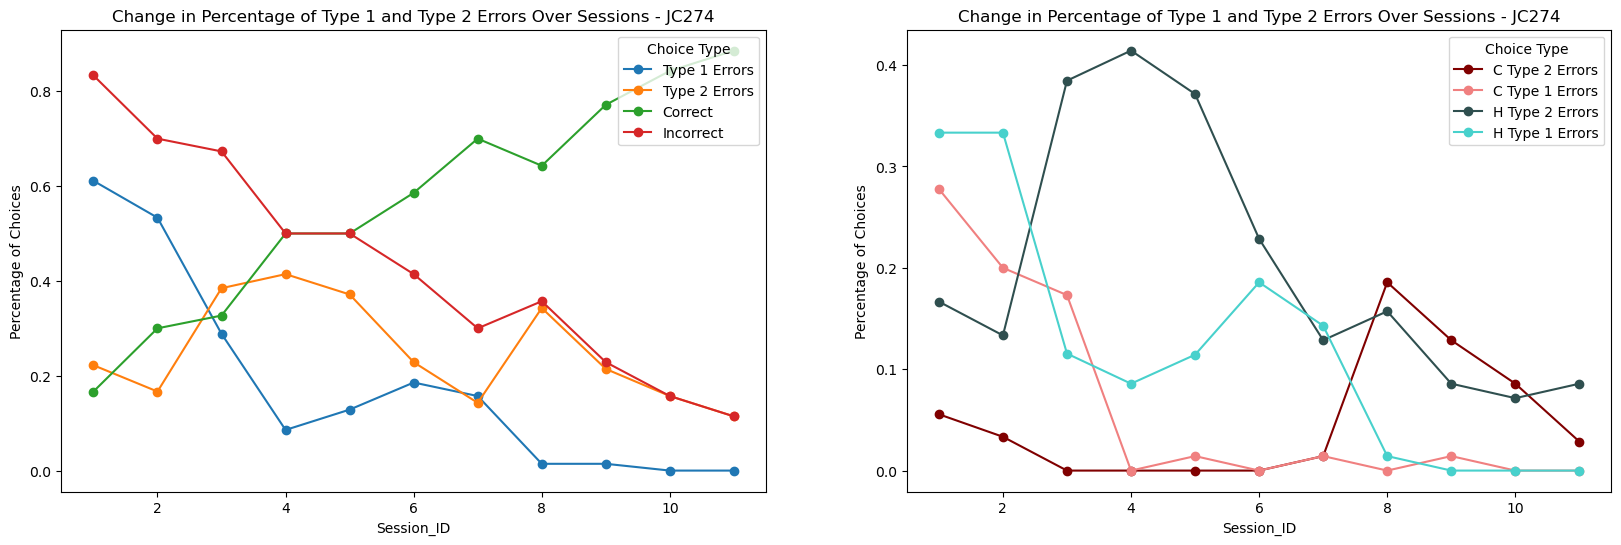

{'C': 8, 'S': 5}


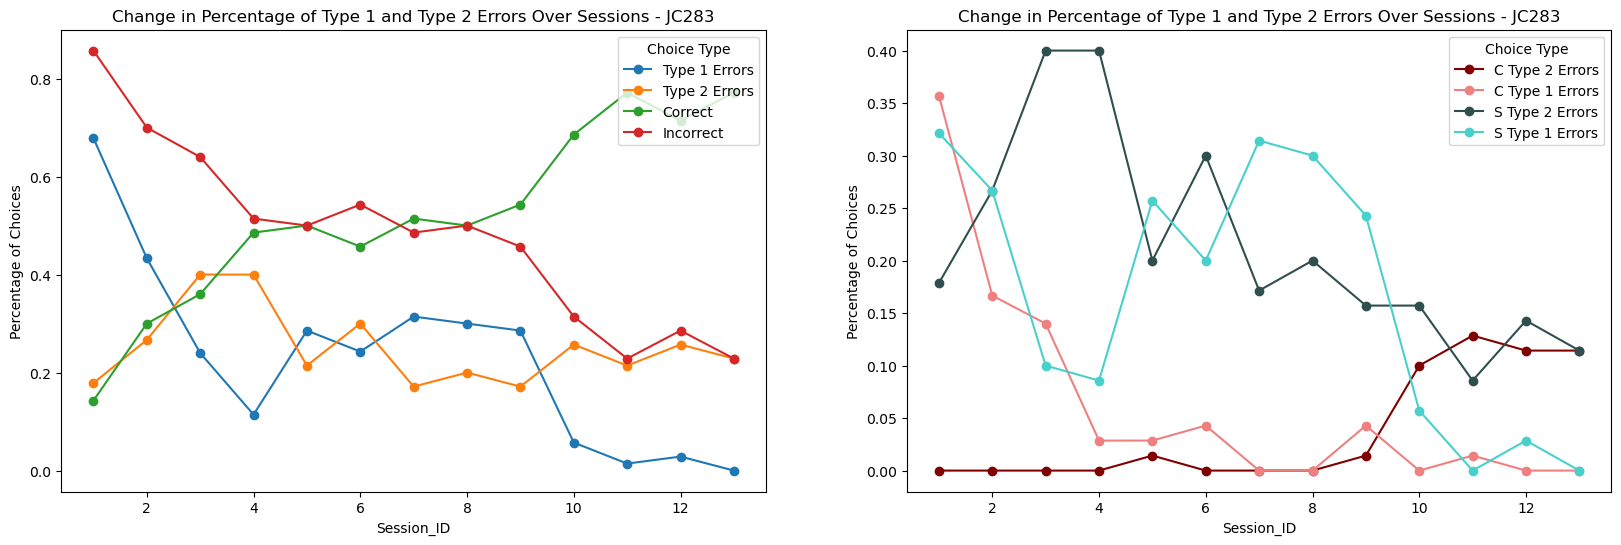

In [108]:
for animal in animals:
    df = data[animal]

#     # Assuming your DataFrame is named 'df'
#     # Create a pivot table to identify the correct arms for each flavor
#     pivot_df = pd.pivot_table(df, index='Flavor', columns='CorrectBool', values='Arm', aggfunc='first', fill_value=0)
#     # Extract the correct arms for each flavor
#     correct_arms = pivot_df[1]
#     # Convert the Series to a dictionary
#     flavor_to_correct_arm = correct_arms.to_dict()
#     print(flavor_to_correct_arm)
    
        # Filter the DataFrame for days with 2 flavors
    days_with_2_flavors = df['Session_ID'].loc[df.groupby('Session_ID')['Flavor'].transform('nunique') == 2].unique()
    df_filtered = df[df['Session_ID'].isin(days_with_2_flavors)]
    df = df_filtered
    # Create a pivot table to identify the correct arms for each flavor
    pivot_df = pd.pivot_table(df_filtered, index='Flavor', columns='CorrectBool', values='Arm', aggfunc='first', fill_value=0)
    # Extract the correct arms for each flavor
    correct_arms = pivot_df[1]
    # Convert the Series to a dictionary
    flavor_to_correct_arm = correct_arms.to_dict()
    print(flavor_to_correct_arm)
    
    keys = list(flavor_to_correct_arm.keys())
    # Create a new dictionary 'type2' with values swapped between all pairs of keys
    type2_flavor = flavor_to_correct_arm.copy()
    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            type2_flavor[keys[i]], type2_flavor[keys[j]] = type2_flavor[keys[j]], type2_flavor[keys[i]]

    # Calculate Type 1 and Type 2 errors for each session
    type_1_errors = (
        (df['CorrectBool'] == 0) & (df['Arm'] != df['Flavor'].map(type2_flavor))
    ).groupby(df['Session_ID']).mean()

    type_2_errors = (
        (df['CorrectBool'] == 0) & (df['Arm'] == df['Flavor'].map(type2_flavor))
    ).groupby(df['Session_ID']).mean()
    
    
    type_1_errors_f1 = (
        (df['CorrectBool'] == 0) & (df['Arm'] != df['Flavor'].map(type2_flavor)) & (df['Flavor'] == keys[0])
    ).groupby(df['Session_ID']).mean()
    type_1_errors_f2 = (
        (df['CorrectBool'] == 0) & (df['Arm'] != df['Flavor'].map(type2_flavor)) & (df['Flavor'] == keys[1])
    ).groupby(df['Session_ID']).mean()
    
    type_2_errors_f1 = (
        (df['CorrectBool'] == 0) & (df['Arm'] == df['Flavor'].map(type2_flavor)) & (df['Flavor'] == keys[0])
    ).groupby(df['Session_ID']).mean()
    type_2_errors_f2 = (
        (df['CorrectBool'] == 0) & (df['Arm'] == df['Flavor'].map(type2_flavor)) & (df['Flavor'] == keys[1])
    ).groupby(df['Session_ID']).mean()
    
    correct = ( (df['CorrectBool'] == 1) ).groupby(df['Session_ID']).mean()
    incorrect = ( (df['CorrectBool'] == 0) ).groupby(df['Session_ID']).mean()
    
    f1 = ( (df['Arm'] ==df['Flavor'].map(flavor_to_correct_arm)   ) ).groupby(df['Session_ID']).mean()
    f2 = ( (df['Arm'] == df['Flavor'].map(flavor_to_correct_arm)) ).groupby(df['Session_ID']).mean()

    # Plot the change in the percentage of Type 1 and Type 2 errors for each animal
    plt.figure( figsize=(  20,6))    
    plt.subplot(121)
    type_1_errors.plot(kind='line', marker='o', label='Type 1 Errors')
    type_2_errors.plot(kind='line', marker='o',  label='Type 2 Errors')
    correct.plot(kind='line', marker='o', label='Correct')
    incorrect.plot(kind='line', marker='o', label='Incorrect')

    plt.title(f'Change in Percentage of Type 1 and Type 2 Errors Over Sessions - {animal}')
    plt.xlabel('Session_ID')
    plt.ylabel('Percentage of Choices')
    plt.legend(title='Choice Type', loc='upper right')
#     plt.show()
    
    plt.subplot(122)
    type_2_errors_f1.plot(kind='line', marker='o', label=keys[0] + ' Type 2 Errors', color = 'maroon')
    type_1_errors_f1.plot(kind='line', marker='o',  label=keys[0] + ' Type 1 Errors',color = 'lightcoral')
    type_2_errors_f2.plot(kind='line', marker='o',  label=keys[1] + ' Type 2 Errors',color='darkslategrey')
    type_1_errors_f2.plot(kind='line', marker='o',  label=keys[1] + ' Type 1 Errors',color='mediumturquoise')
#     f1.plot(kind='line', marker='o',  label=keys[0] + ' Chosen',color = 'tab:red')
#     f2.plot(kind='line', marker='o',  label=keys[1] + ' Chosen',color='tab:blue')
    
    plt.title(f'Change in Percentage of Type 1 and Type 2 Errors Over Sessions - {animal}')
    plt.xlabel('Session_ID')
    plt.ylabel('Percentage of Choices')
    plt.legend(title='Choice Type', loc='upper right')
    plt.show()



## Plot accuracy before rule change

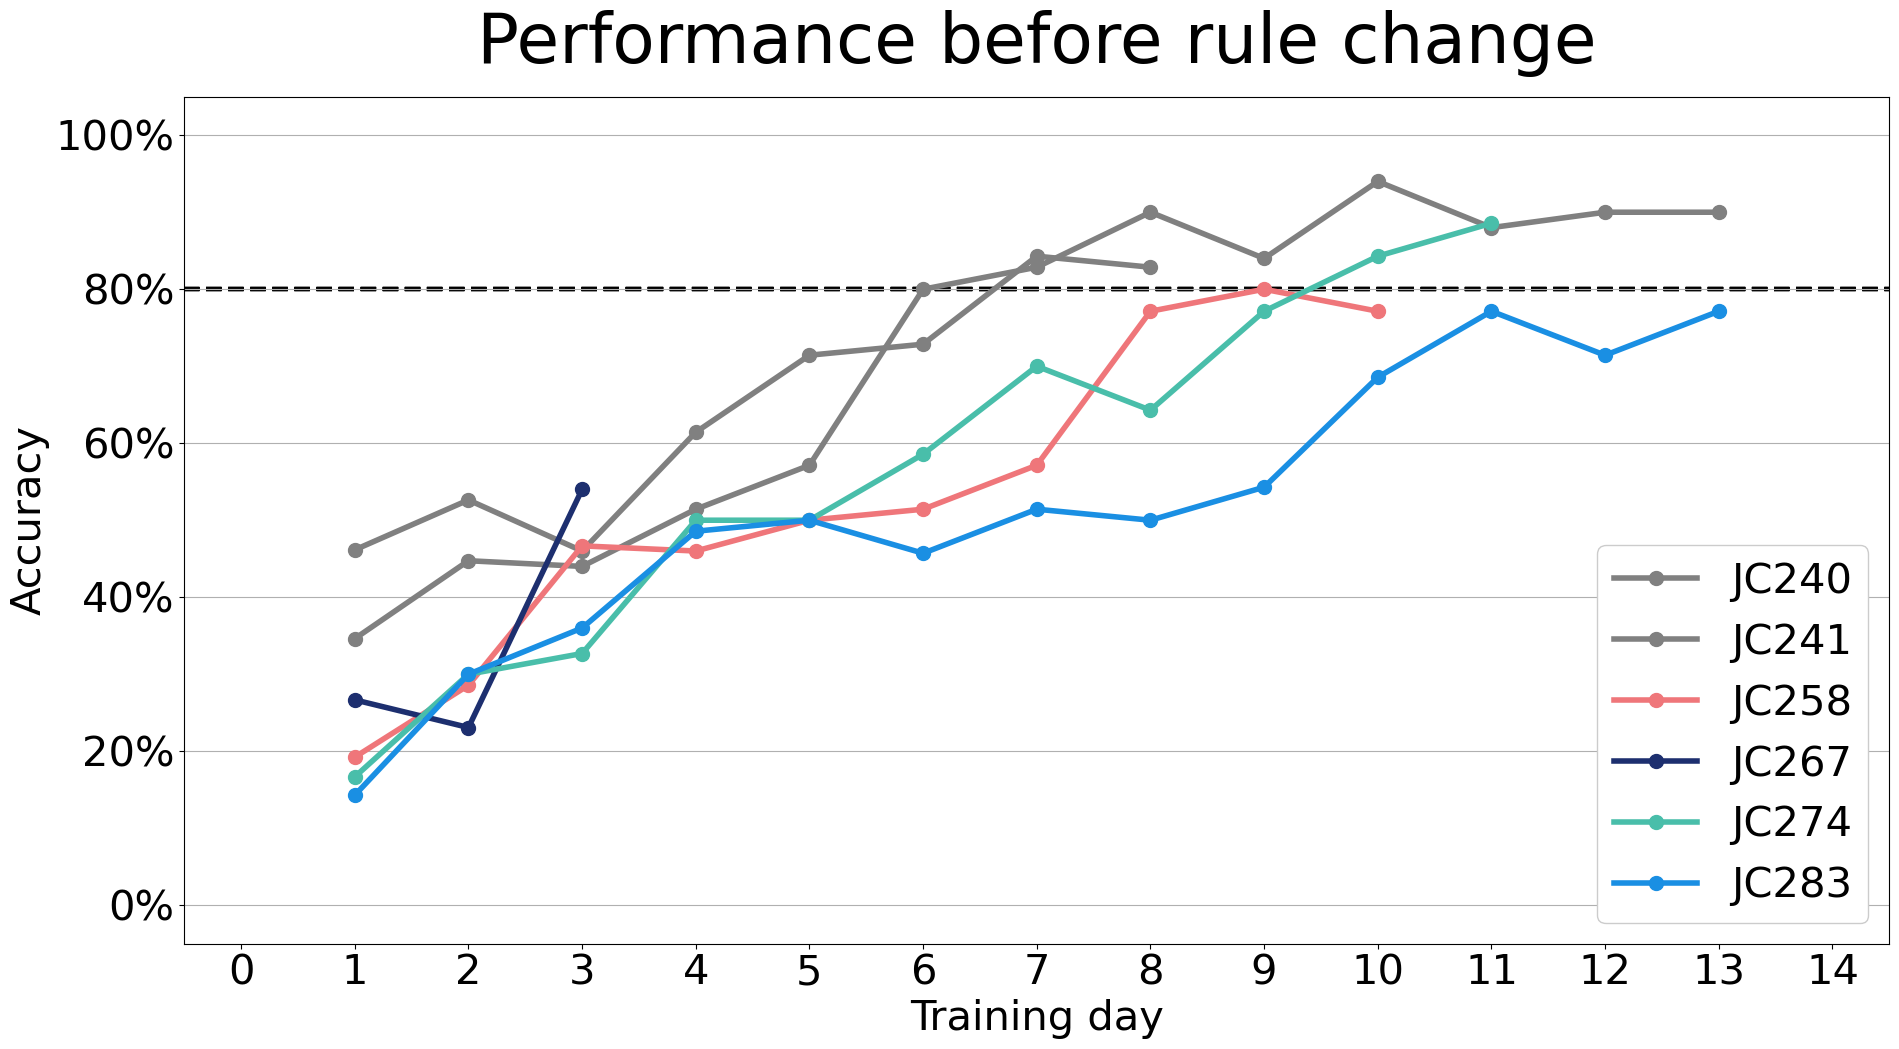

In [26]:
fig, ax = plt.subplots(figsize=(22,11))
title='Performance before rule change'

for animal in animals:
    acc = accuracy[animal].iloc[:rule_change[animal]-1] # accuracy before rule change
    plot_accuracy(acc,
                  animal,
                  ndays=14,
                  title=title,
                  fig=fig,
                  ax=ax)

# save_fig(title, 'svg')

## Plot accuracy after rule change

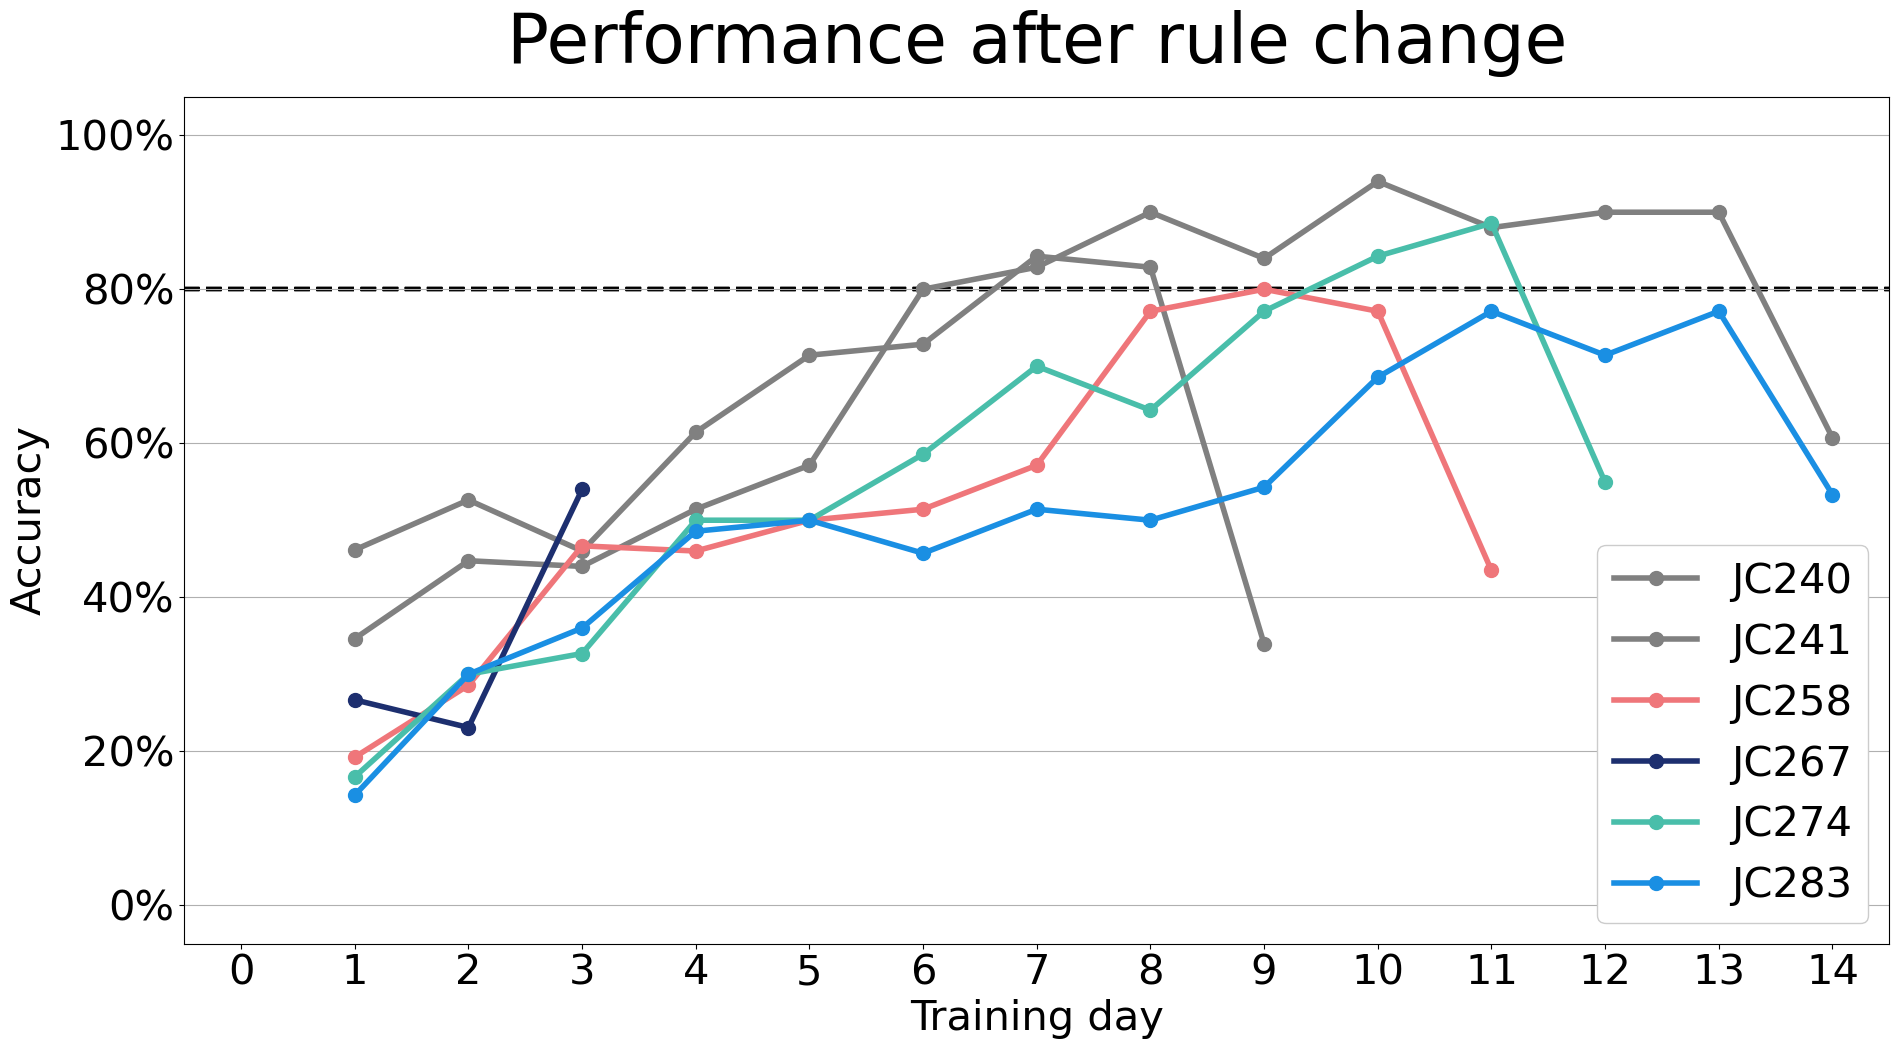

In [27]:
fig, ax = plt.subplots(figsize=(22,11))
title='Performance after rule change'

for animal in animals:
    acc = accuracy[animal].iloc[:rule_change[animal]] # accuracy before rule change
    plot_accuracy(acc,
                  animal,
                  ndays=14,
                  title=title,
                  fig=fig,
                  ax=ax)
    
# save_fig(title, 'svg')

## Plot performance by cue type (all animals)

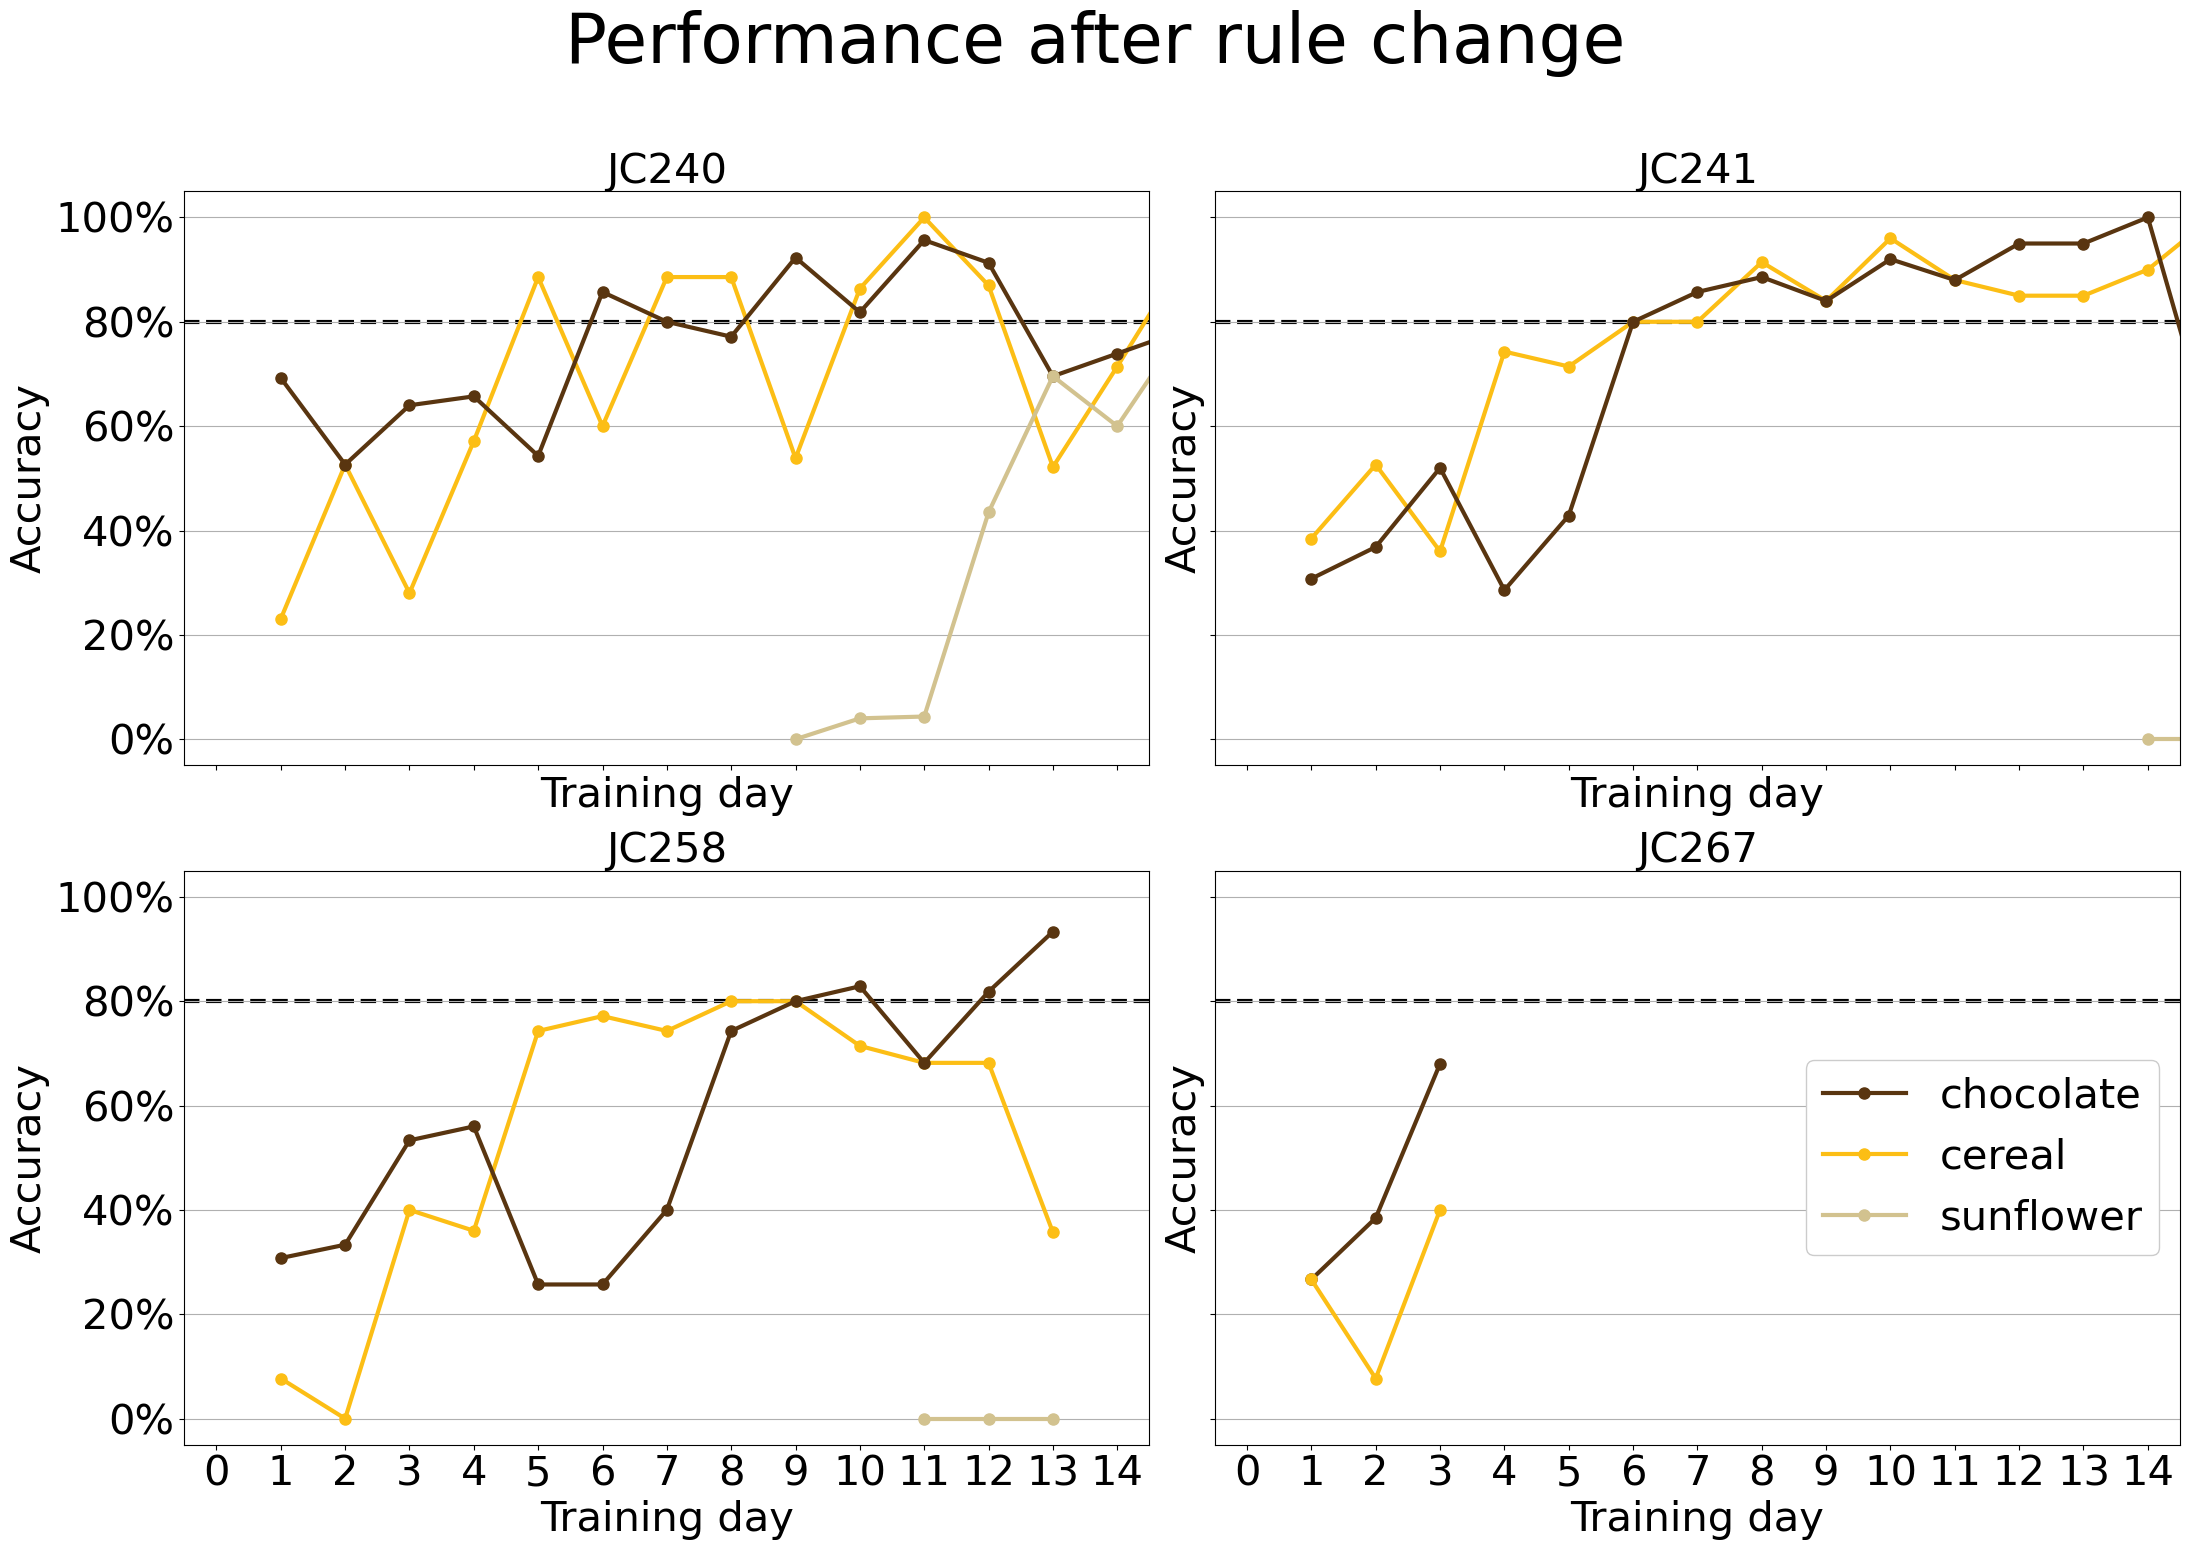

In [28]:
ndays=14 # set the number of days to plot

# Make a large plot with 4 subplots
rows, cols = 2, 2
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(22,15))
fig.suptitle(title, fontsize=50, y=1.03)
title='Performance by cue type'

# Iterate over each subplot and plot
for ax, animal in zip(axes.flatten(), animals):
    plot_accuracy_by_cue(accuracy_by_cue[animal],
                         animal,
                         cues[animal],
                         ndays,
                         ax)
    
    # Plot legend on JC267 subplot
    if animal == 'JC267':
        legend_handles = []
        for cue, color in cue_names.items():
            legend_handles.append(plt.Line2D([],[], color=color, label=cue, linewidth=3, marker='o', markersize=8))
        ax.legend(handles=legend_handles, loc=7, fontsize=30, framealpha=1)

## Plot performance by cue type (individual animals)

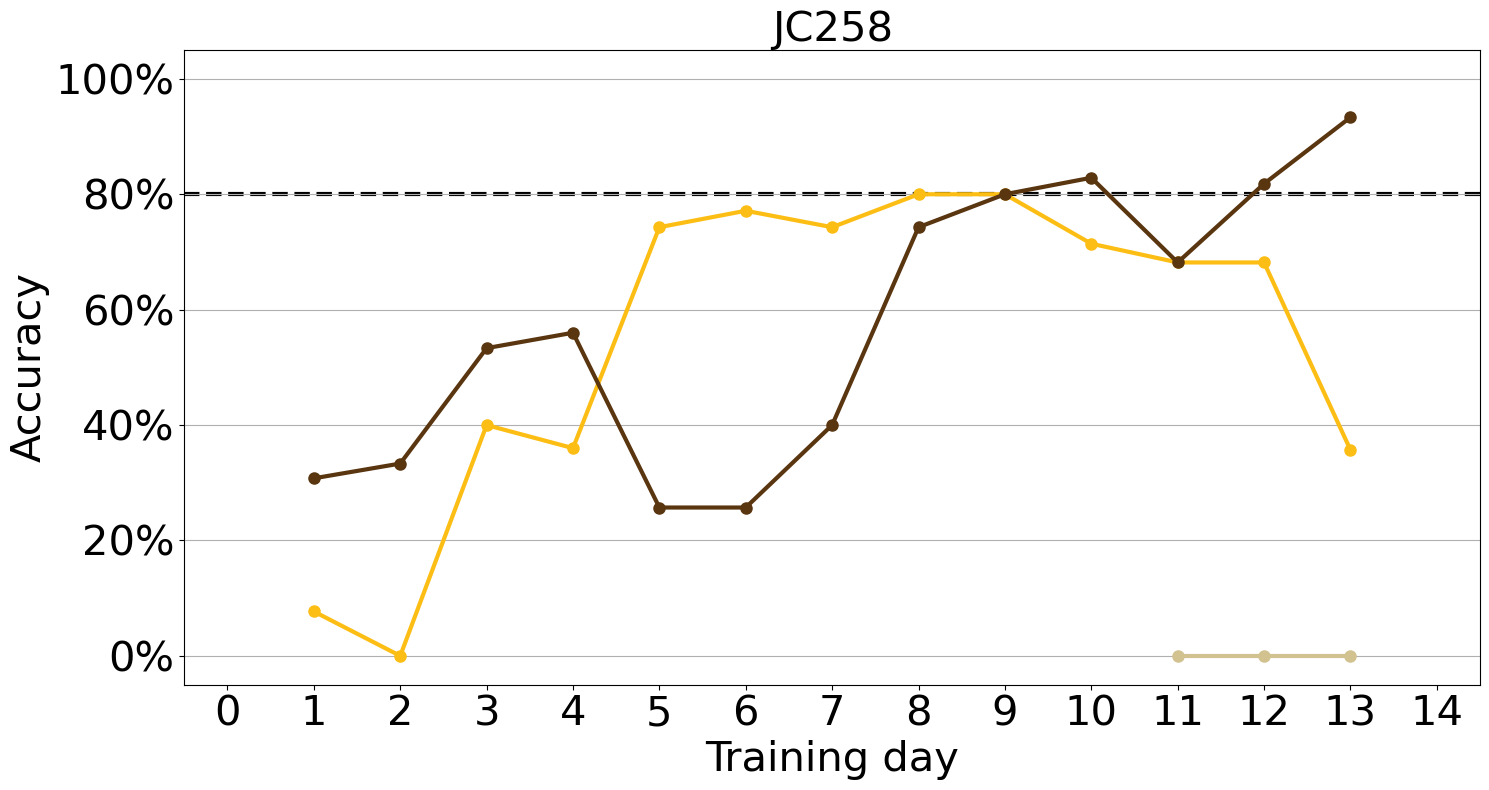

In [29]:
animal='JC258'
plot_accuracy_by_cue(accuracy_by_cue[animal],
                     animal,
                     cues[animal],
                     ndays,
                    )

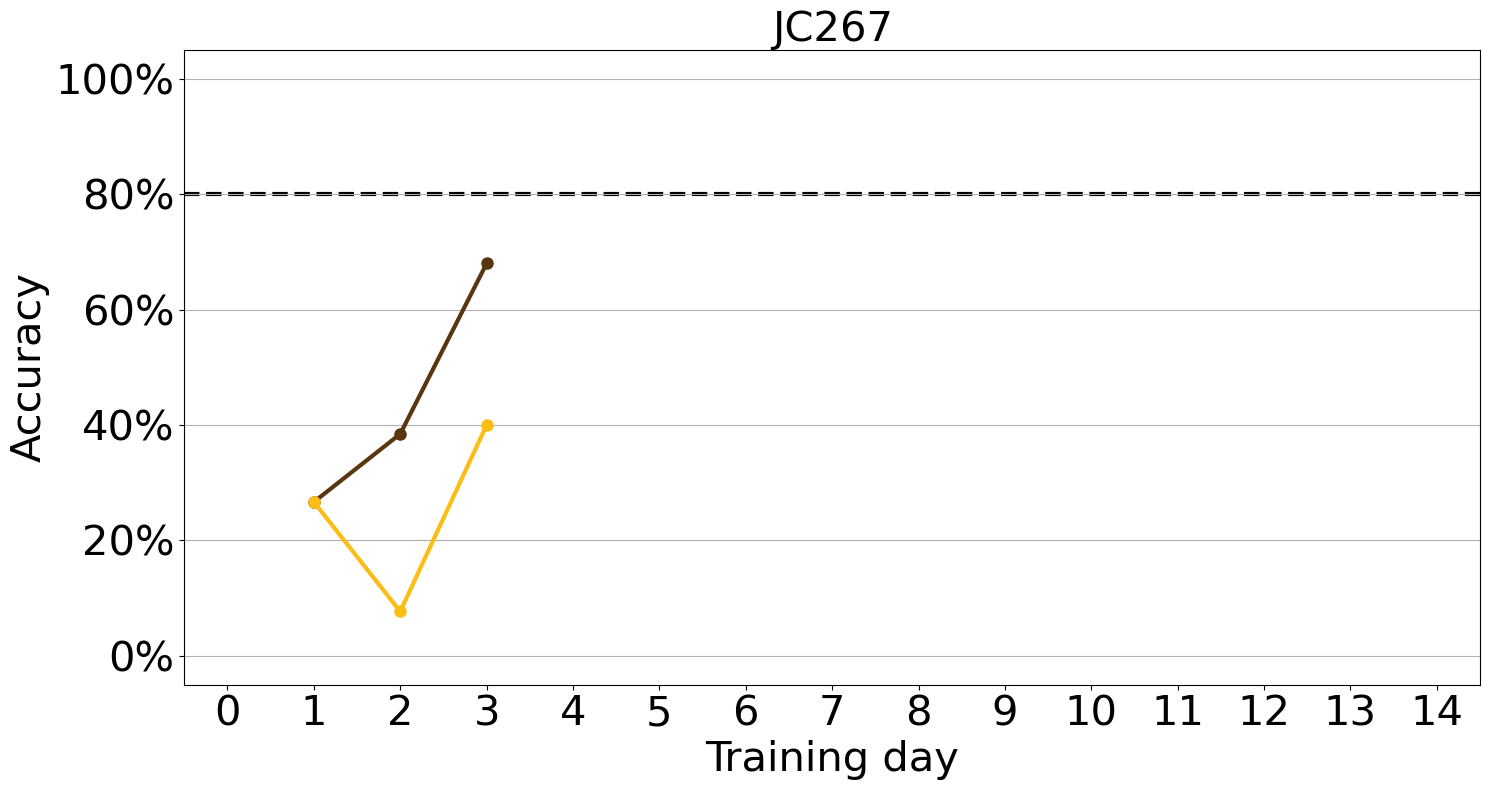

In [30]:
animal='JC267'
plot_accuracy_by_cue(accuracy_by_cue[animal],
                     animal,
                     cues[animal],
                     ndays,
                    )

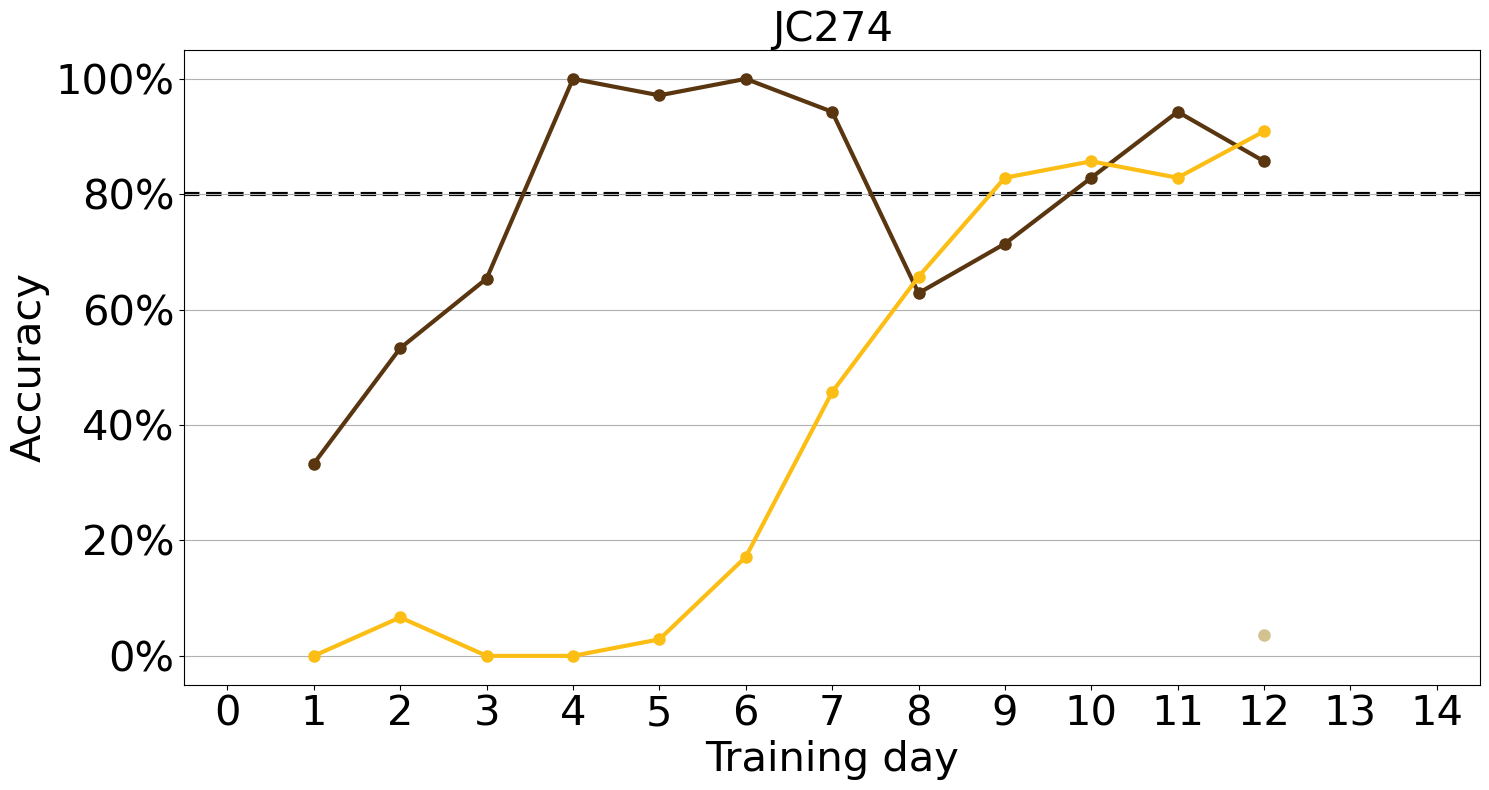

In [31]:
animal='JC274'
plot_accuracy_by_cue(accuracy_by_cue[animal],
                     animal,
                     cues[animal],
                     ndays,
                    )

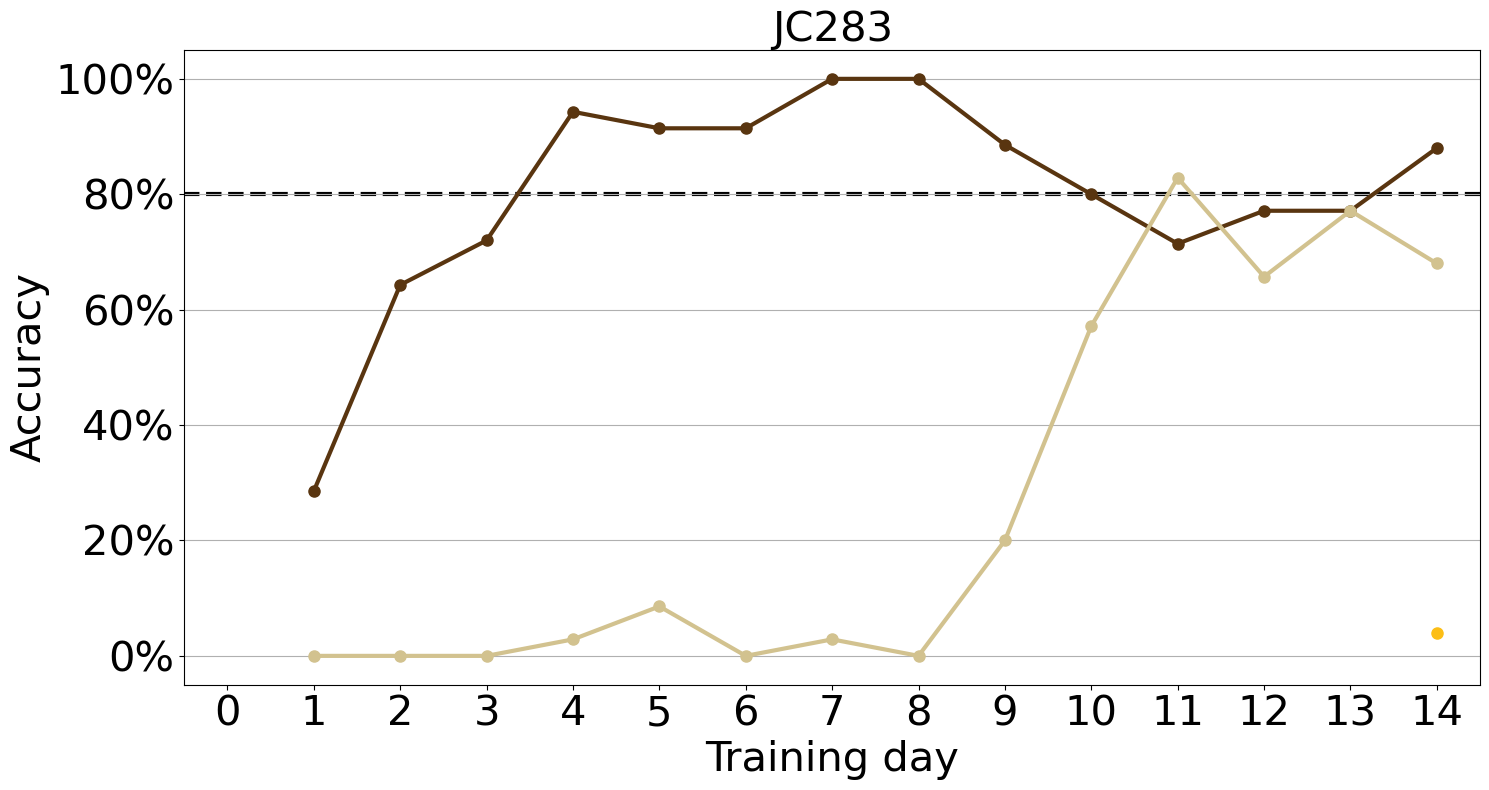

In [32]:
animal='JC283'
plot_accuracy_by_cue(accuracy_by_cue[animal],
                     animal,
                     cues[animal],
                     ndays,
                    )

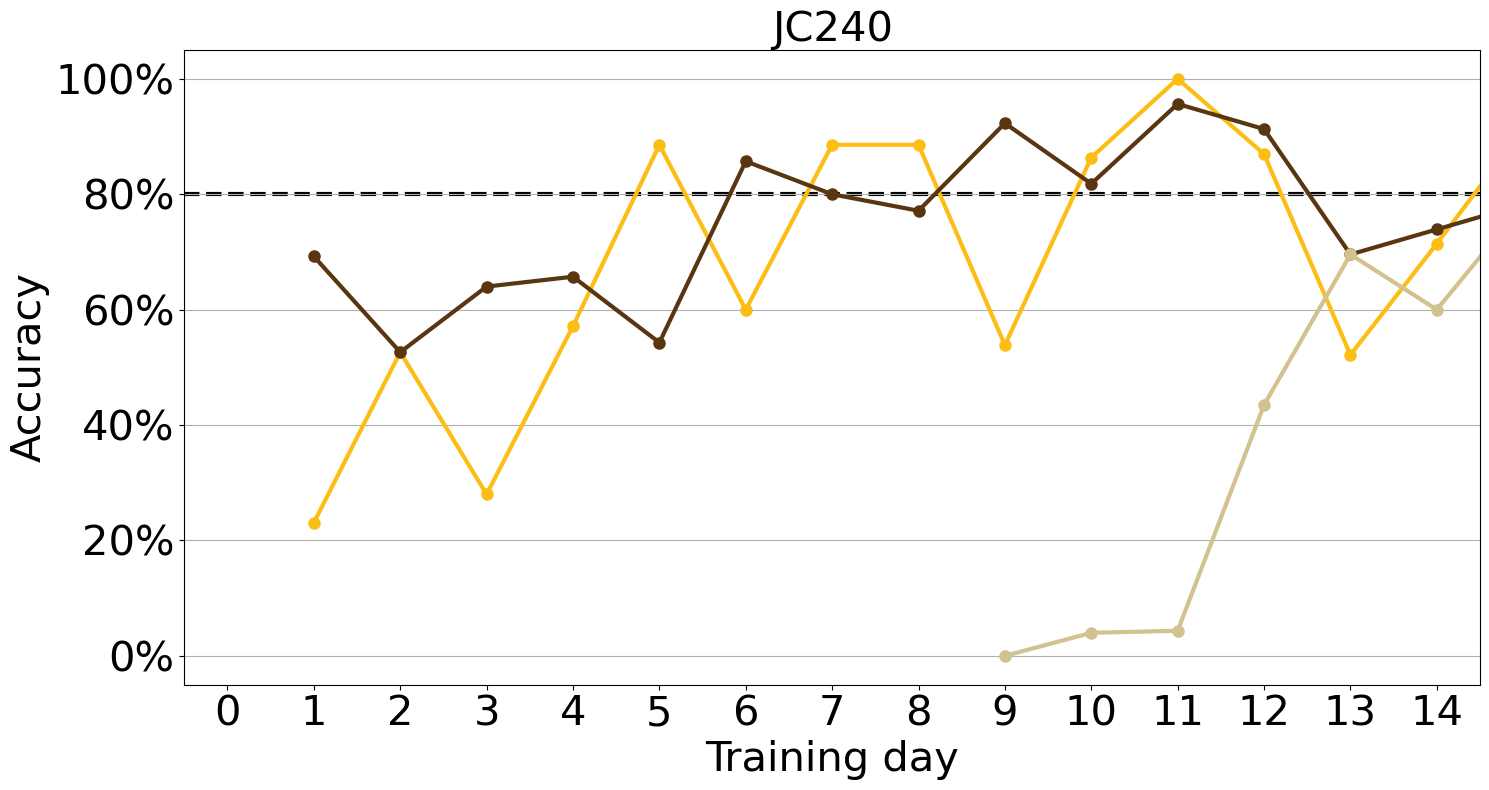

In [33]:
animal='JC240'
plot_accuracy_by_cue(accuracy_by_cue[animal],
                     animal,
                     cues[animal],
                     ndays,
                    )